## Read me 
This notebook contains a script to read and plot the amplitude data for the three codes:
1. WavesWater.c
2. ViscousOilOnWater.c
3. IceOnWaterWaves.

## Packages and Functions

In [92]:
#Import relevant packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Use Latex and serif font
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#Reads data from a file and separates columns into variables of time and Amplitude
def read_extract(dat_file):
    df = pd.read_csv(dat_file, sep=' ')
    df.head()
    nb_col = len(df.columns)
    
    if (nb_col==2):
        t = df.iloc[:, 0].to_numpy()
        Amp = df.iloc[:, 1].to_numpy()
        A0 = Amp[0]
        return A0, t, Amp
    
    else :
        t = df.iloc[:, 0].to_numpy()
        AmpOcean = df.iloc[:, 1].to_numpy()
        AmpIce = df.iloc[:, 2].to_numpy()
        A0_Ocean = AmpOcean[0]
        A0_Ice = AmpIce[0]
        return A0_Ocean, A0_Ice, t, AmpOcean, AmpIce

# Bare case

## Amplitude of single interface problem and comparison with Basilisk code 
plots the amplitude of an interface between air and ocean (WavesWater.c), and compares the amplitude with the basilisk code (gravity.c)

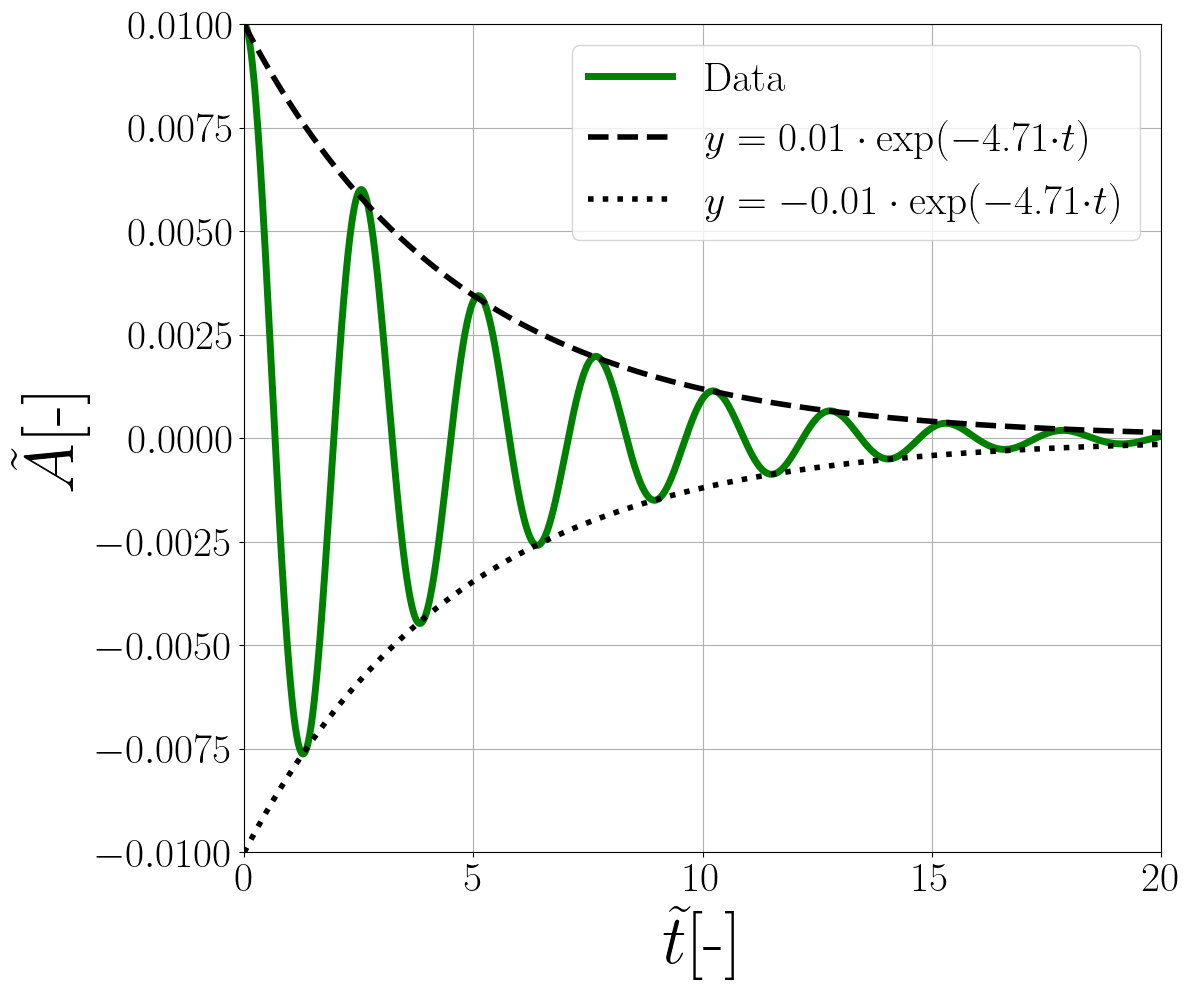

In [4]:
#Import relevant packages 
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

#Import data from Waterwaves.c and gravity.c
A0, t, Amp = read_extract(f'WavesWater_/1011/center_amplitude.txt')
#A0_ref, t_ref, Amp_ref = read_extract('amplitude.dat')

#Define the exponential decay
def decay_function(t, tau):
    return 0.01 * np.exp(-t / tau)

#Select peaks of Amplitude data 
def find_maxima(t,Amp):
    peaks, _ = find_peaks(Amp) #Find local maxima and create array with only the maximas 
    t_max = np.concatenate(([t[0]], t[peaks], [t[-1]]))
    Amp_max = np.concatenate(([Amp[0]], Amp[peaks], [Amp[-1]]))
    return t_max,Amp_max
    
#Find the optimal value of tau  
def optimal_tau(t_max, Amp_max):
    initial_guess_tau = 0.5
    popt, pcov = curve_fit(decay_function, t_max, Amp_max, p0=initial_guess_tau)
    tau_opt = popt[0]
    #print("Optimized parameter: tau =", tau_opt)
    return tau_opt

t_max, Amp_max = find_maxima(t,-Amp)
t_min, Amp_min = find_maxima(t,-Amp)
tau_opt = optimal_tau(t_max, Amp_max)



#Amplitude of interface between air and ocean
fig, ax = plt.subplots(1, 1, figsize=(12,10))
ax.plot(t, Amp, 'g-', lw=5, label='Data')
#ax.scatter(t_max, -Amp_max,s=30)
ax.plot(t,decay_function(t,tau_opt), 'k', lw=4, linestyle='--', label=r'$y = 0.01 \cdot \exp(-$' + '{:.2f}'.format(tau_opt)+'$ \cdot t)$')
ax.plot(t,-decay_function(t,tau_opt), 'k', lw=4, linestyle=':', label=r'$y = -0.01 \cdot \exp(-$' + '{:.2f}'.format(tau_opt)+'$ \cdot t)$')
ax.set_xlabel(r'$\tilde{t}$[-]', fontsize=50)
ax.set_ylabel(r'$\tilde{A}$[-]', fontsize=50)
ax.tick_params(axis='both', which='major', labelsize=30)
ax.set_xlim([0., 20.0])
ax.set_ylim([-0.01, 0.01])
ax.legend(fontsize=30)
ax.grid(True)
#plt.title("Waterwaves.c")
plt.tight_layout()
plt.savefig("WavesWater")
plt.show()


## Amplitude of a single interface 

Comparing the Amplitude of the bare case with the oil layer case. The oil layer case where $\mu_IceOcean = 1$ should match perfectly with the bare case.

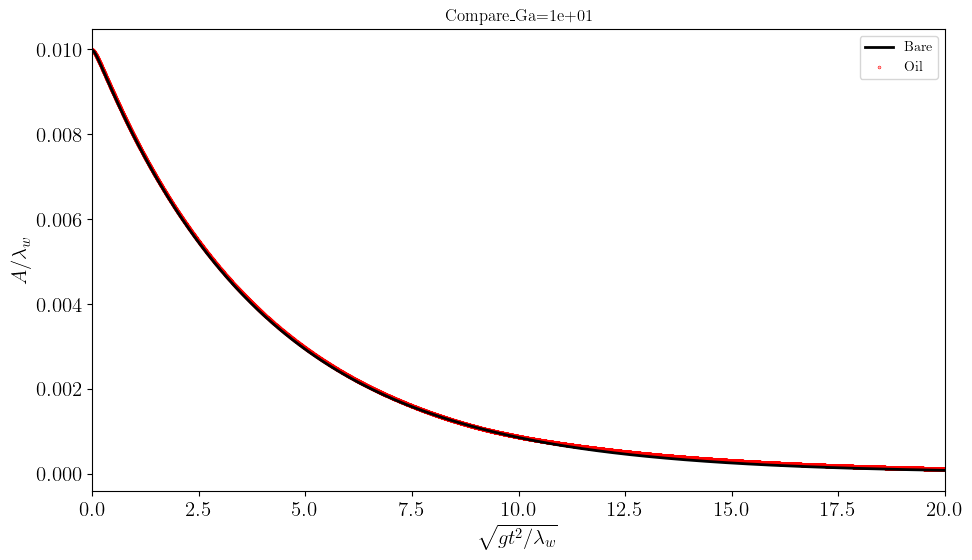

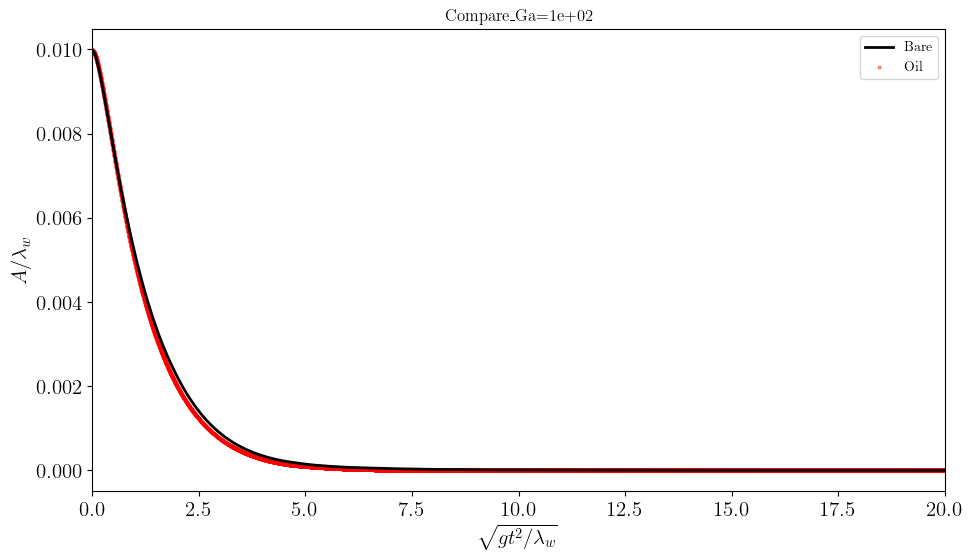

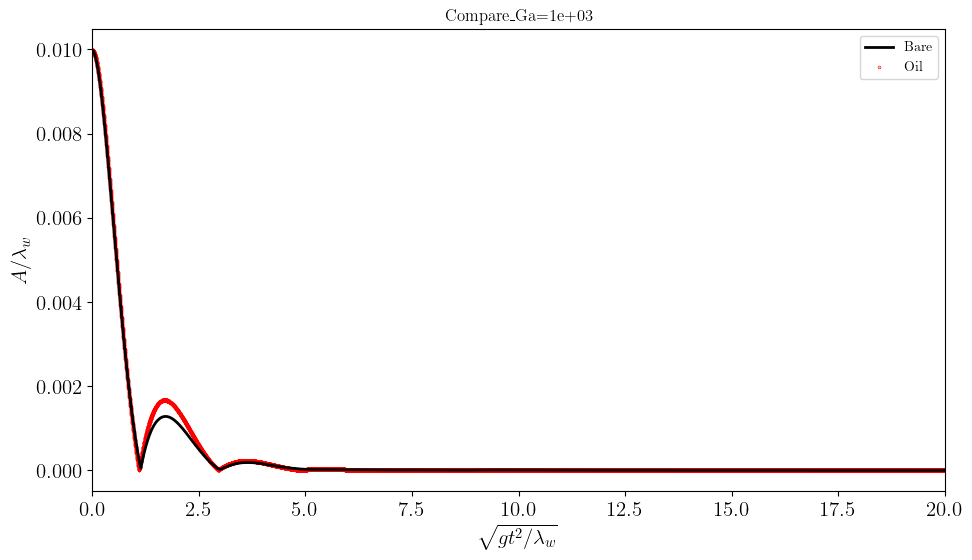

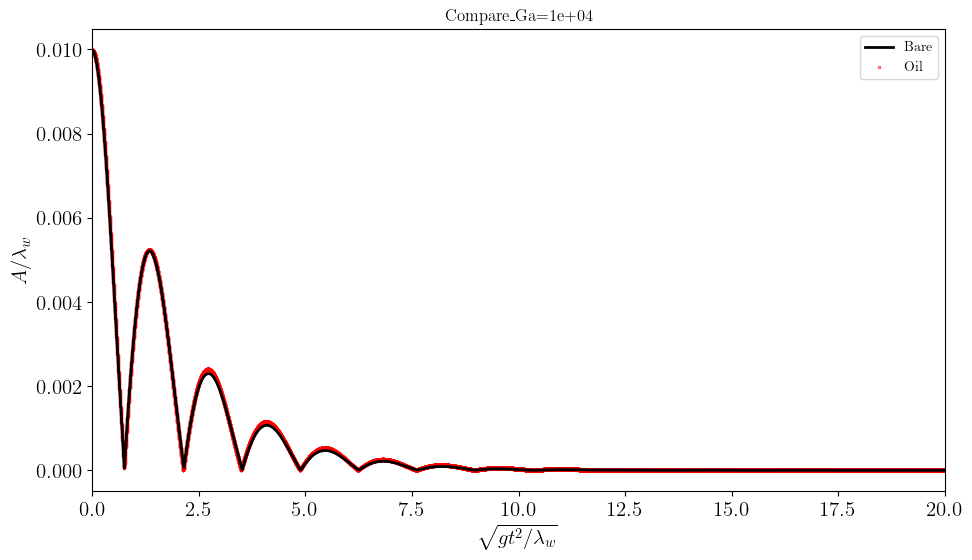

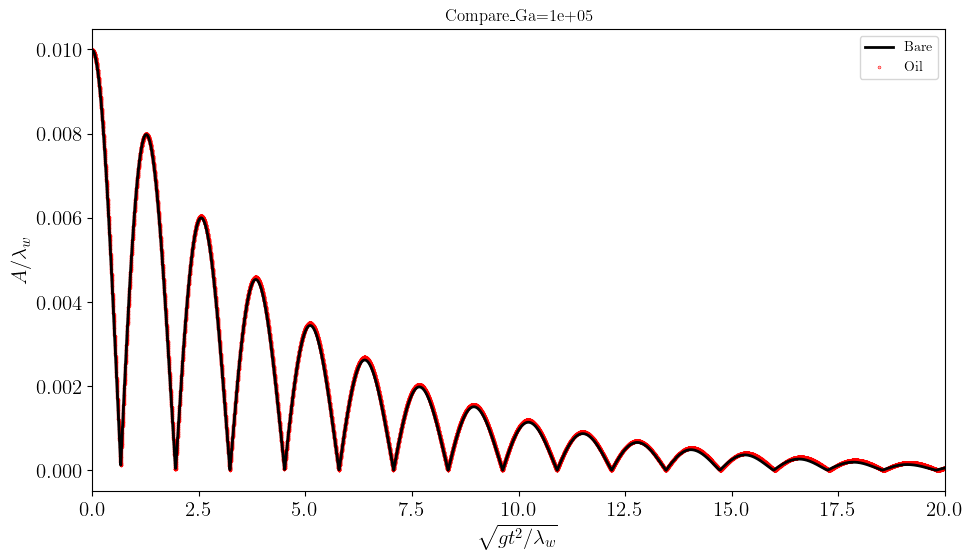

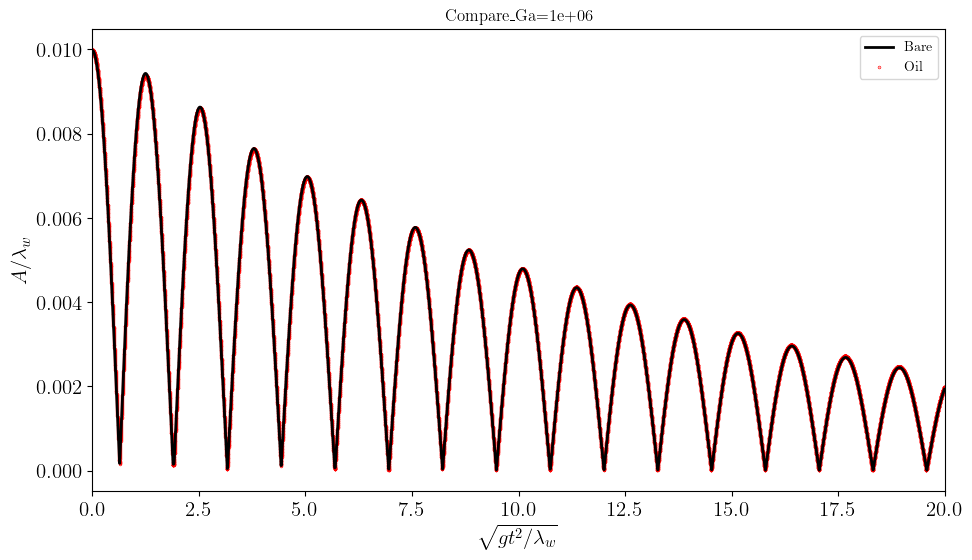

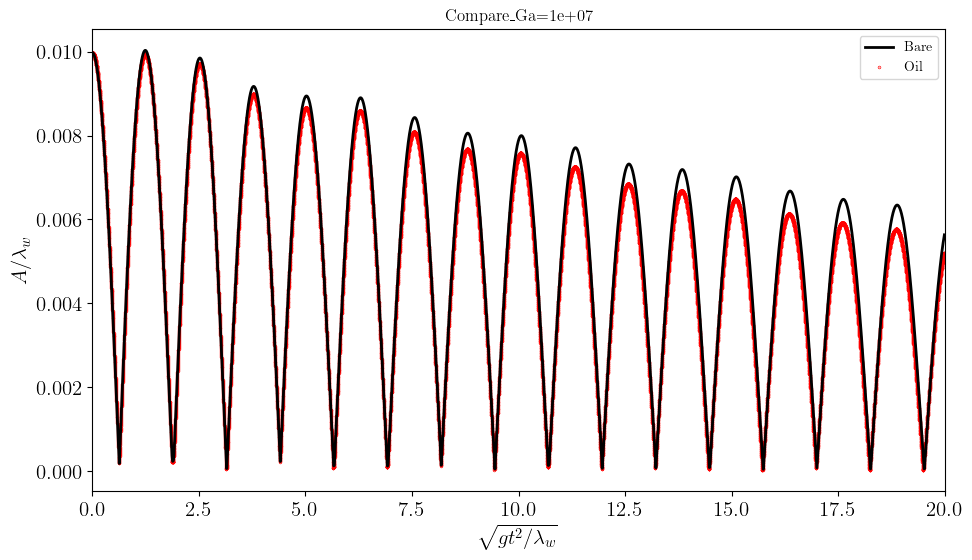

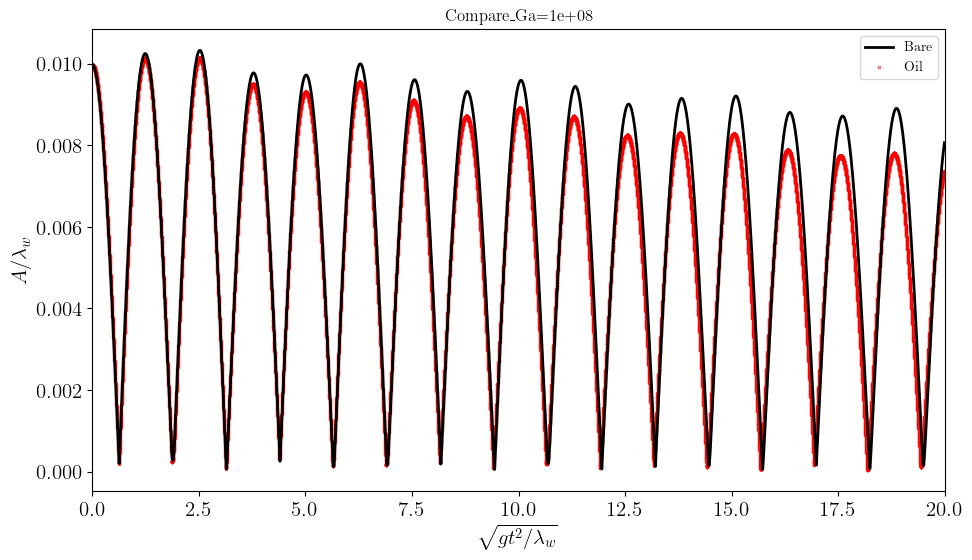

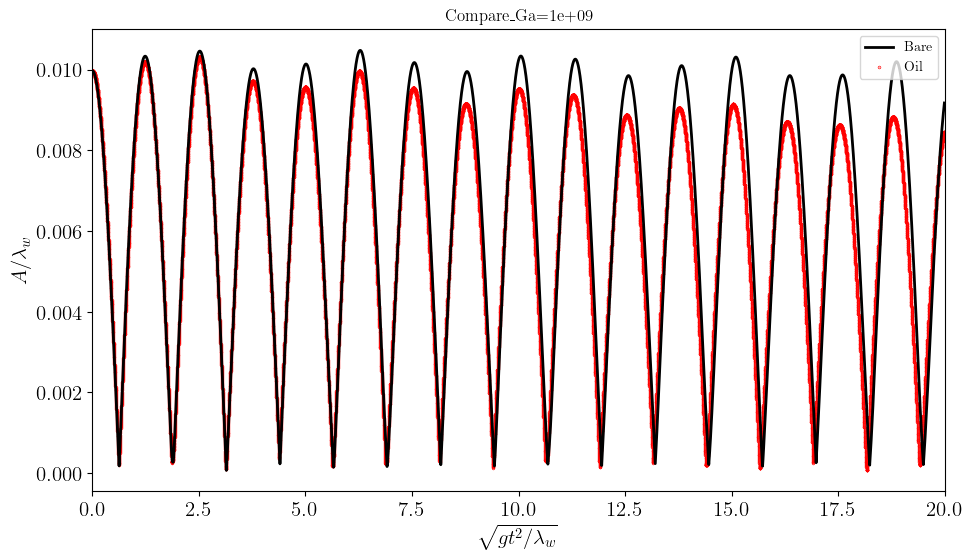

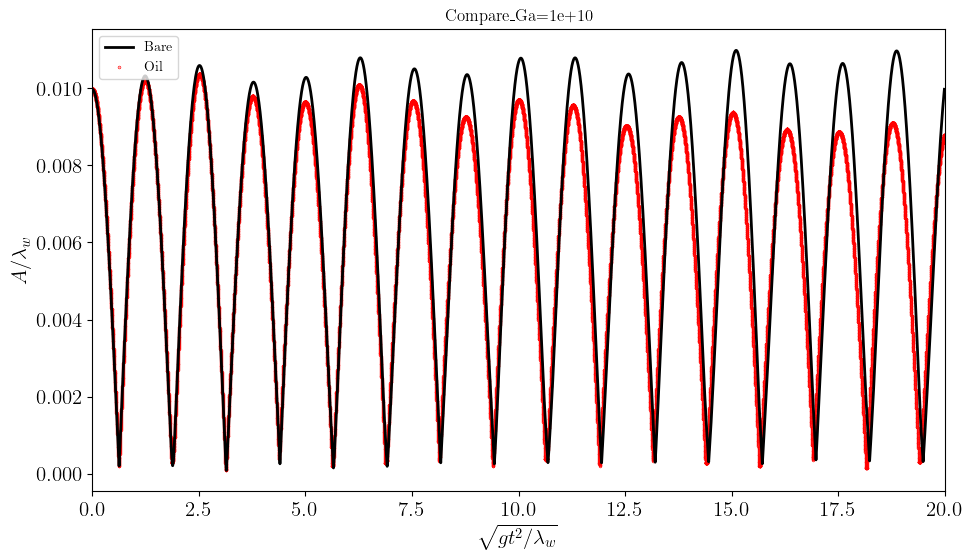

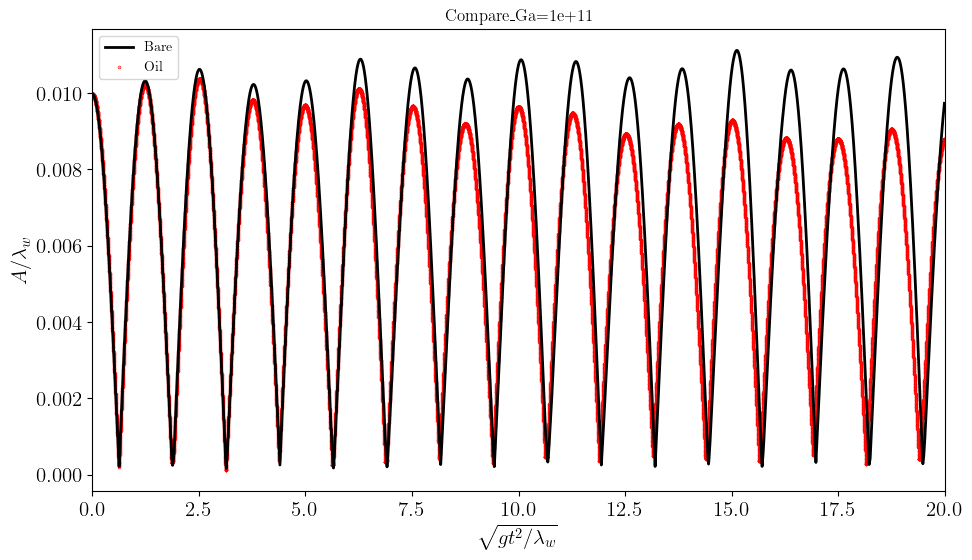

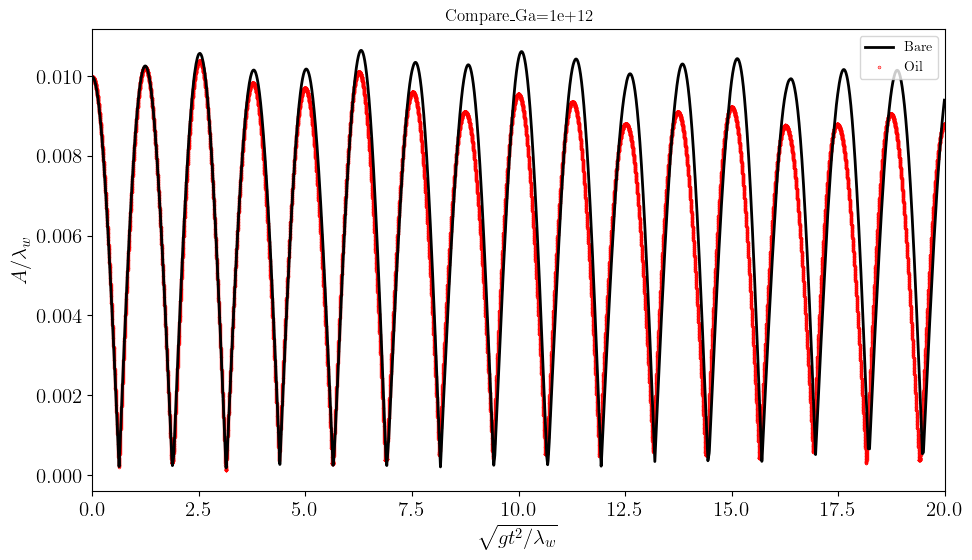

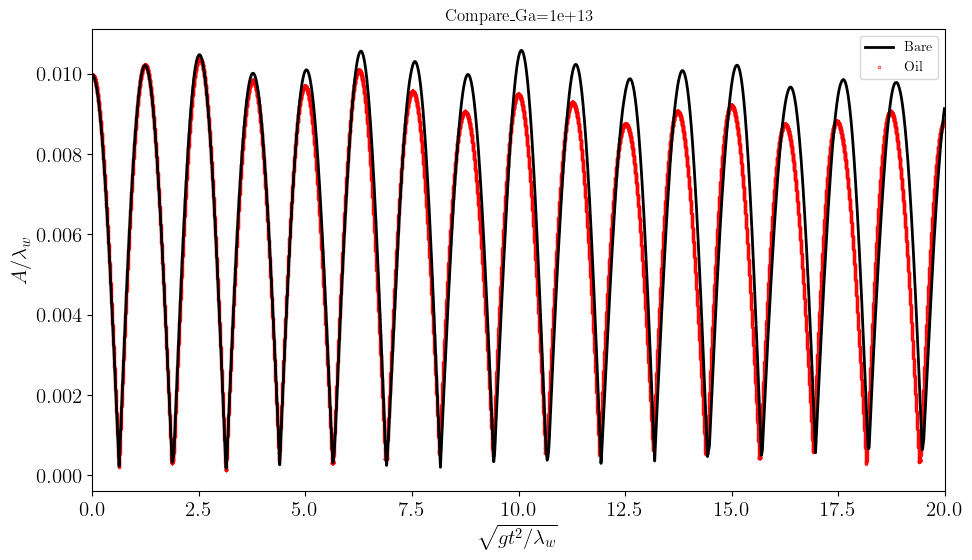

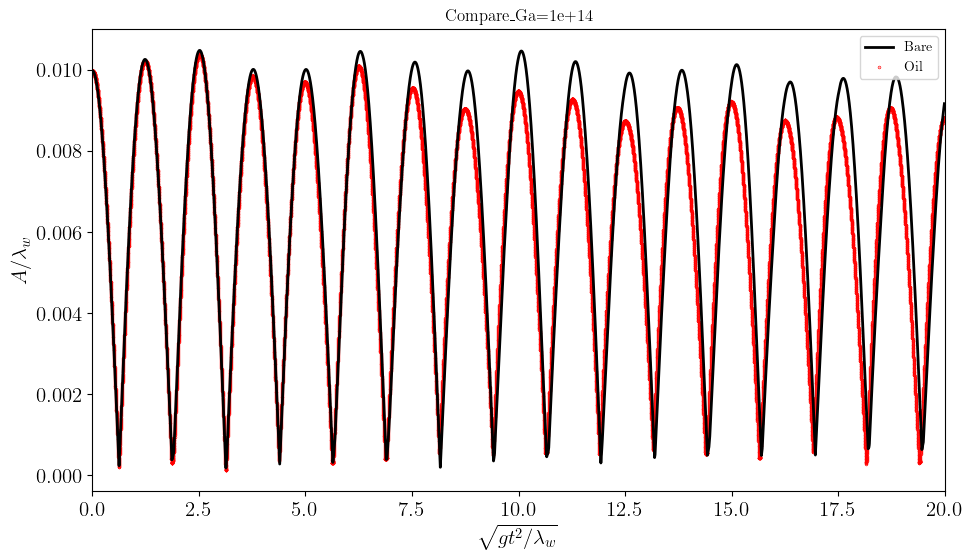

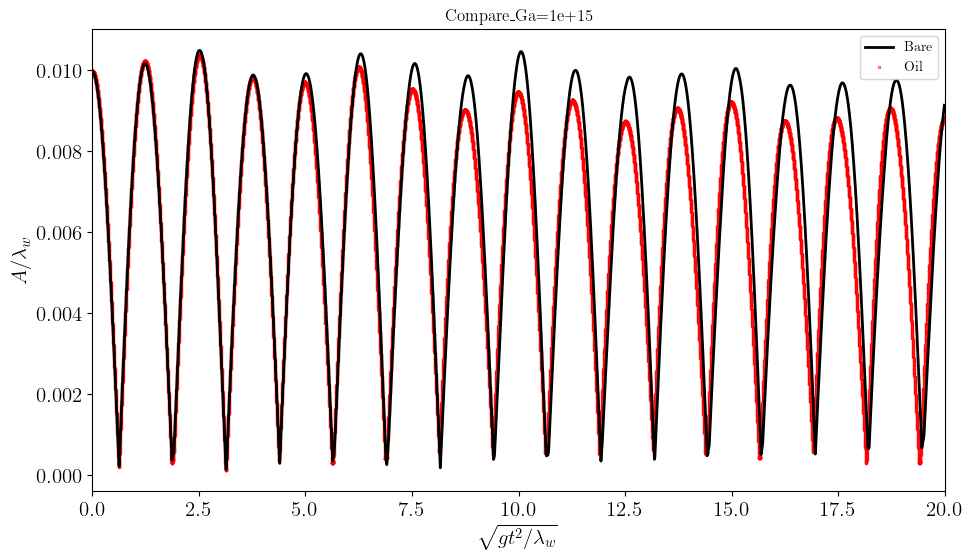

In [34]:
#Initialize variables 
#mu_iceOcean = [1e-3,1e-1,1e0,1e1]
colors = ['k', 'r', 'b', 'g', 'y', 'm', 'c', 'w', 'orange', 'pink', 'purple', 'brown', 'lime', 'teal']

#Function that extracts Amplitude data from ViscousOilonWaterWaves.c, numbered folders, and plots the 
#amplitude of both interfaces as a function of time for different mu_IceOcean
def plot_Gacompare(i_Bare,i_Oil,string):
    fig, ax = plt.subplots(1, 1, figsize=(11,6))
    A0_Bare, t_Bare, Amp_Bare = read_extract(f'WavesWater_/{i_Bare}/amplitude.dat')
    A0_Ocean, A0_Ice, t_Oil, AmpOcean, AmpIce = read_extract(f'ViscousOilOnWaterWaves_/{i_Oil}/amplitude.dat')
    ax.plot(t_Bare, Amp_Bare, colors[0], lw=2, label='Bare')
    ax.scatter(t_Oil, AmpIce, s=0.2, c=colors[1], lw=2, label='Oil')
    ax.set_xlabel(r'$\sqrt{gt^2/\lambda_w}$', fontsize=15)
    ax.set_ylabel(r'$A/\lambda_w$', fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_xlim([0., 20])
    #ax.set_ylim([0., GridA0_Ice])
    ax.legend()
    plt.title(string)
    plt.savefig(string)
    plt.show()

#plots for various values of Ga
#starting folders
Bare = 1008 
Oil = 2171
for i in range(0,15):
    Ga = 10** (i+1)
    if (Ga == 1e4):
     plot_Gacompare(1006,2170,"Compare_Ga={:.0e}".format(Ga))
    elif (Ga == 1e9):
     plot_Gacompare(1007,2169,"Compare_Ga={:.0e}".format(Ga))
    else:
     plot_Gacompare(Bare,Oil,"Compare_Ga={:.0e}".format(Ga))
     Bare += 1
     Oil += 1

# Oil

## Amplitudes
For purely viscous ice, I'm plotting the amplitude for both interfaces of the ice shelf for mu_IceOcean, Ga, grid level. 
Note: changing mu_IceOcean means that i'm only changing the viscosity of the ice layer whilst keeping the viscosity of water and air the same, whereas changing Ga translates to changing the viscosity of all three layers but keeping their relative viscosities the same. 

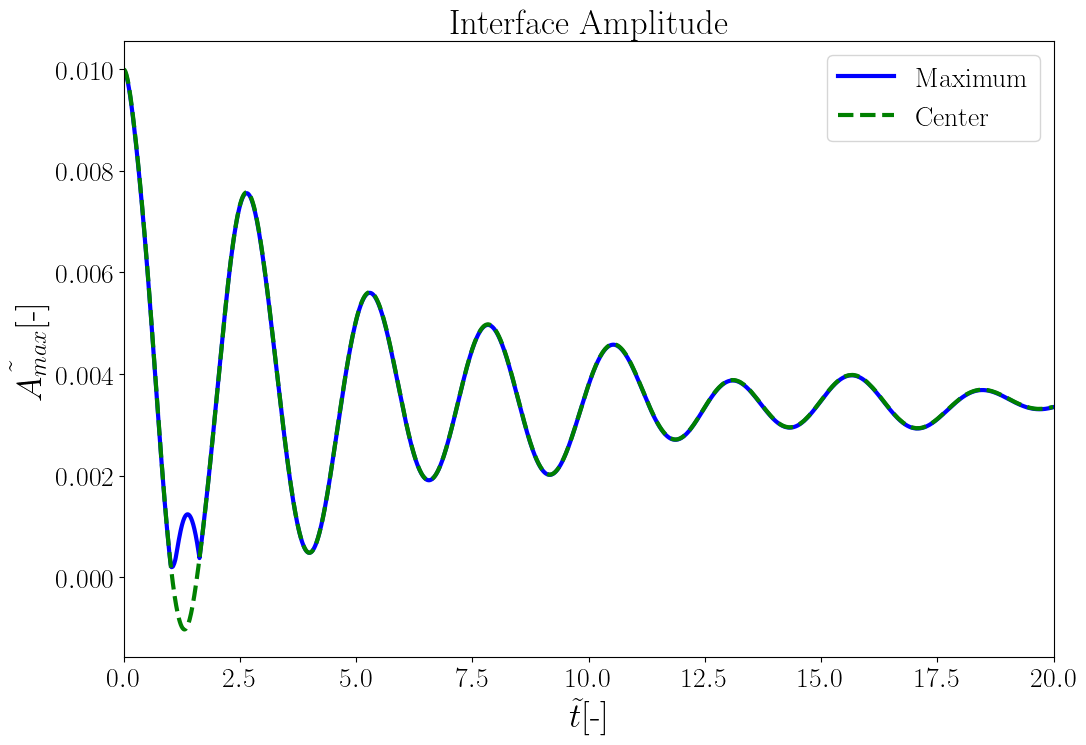

In [22]:
#Compare interface height max and height center
colors = ['k', 'r', 'b', 'g', 'y', 'm', 'c', 'w', 'orange', 'pink', 'purple', 'brown', 'lime', 'teal']
linestyles = ['-', '--', '-.', ':','solid']


fig, ax = plt.subplots(1, 1, figsize=(12,8))
A0_Ocean, A0_Ice, t_max, AmpOcean, Amp_max = read_extract(f'IceOnWaterWaves_/3050/amplitude.dat')
A0_Ocean, A0_Ice, t_center, AmpOcean, Amp_center = read_extract(f'IceOnWaterWaves_/3050/center_amplitude.txt')
ax.plot(t_max, Amp_max, colors[2],linestyle=linestyles[4], lw=3, label='Maximum')
ax.plot(t_center, Amp_center, colors[3],linestyle=linestyles[1], lw=3, label='Center')
ax.set_xlabel(r'$\tilde{t}$[-]', fontsize=25)
ax.set_ylabel(r'$\tilde{A_{max}}$[-]', fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlim([0., 20])
#ax.set_ylim([0., A0_Ice])
ax.legend(fontsize=20)

plt.title("Interface Amplitude", fontsize=25)
plt.savefig("E=1,center")
plt.show()

### Changing Viscosity of Ice 
In order to do this, we change mu_IceOcean.
This is done for dt 1e-3 and dt 1e-4 to see if higher values of mu_Ice/Ocean converge for smaller dt.
The geometry we consider here is anti-symmetric.

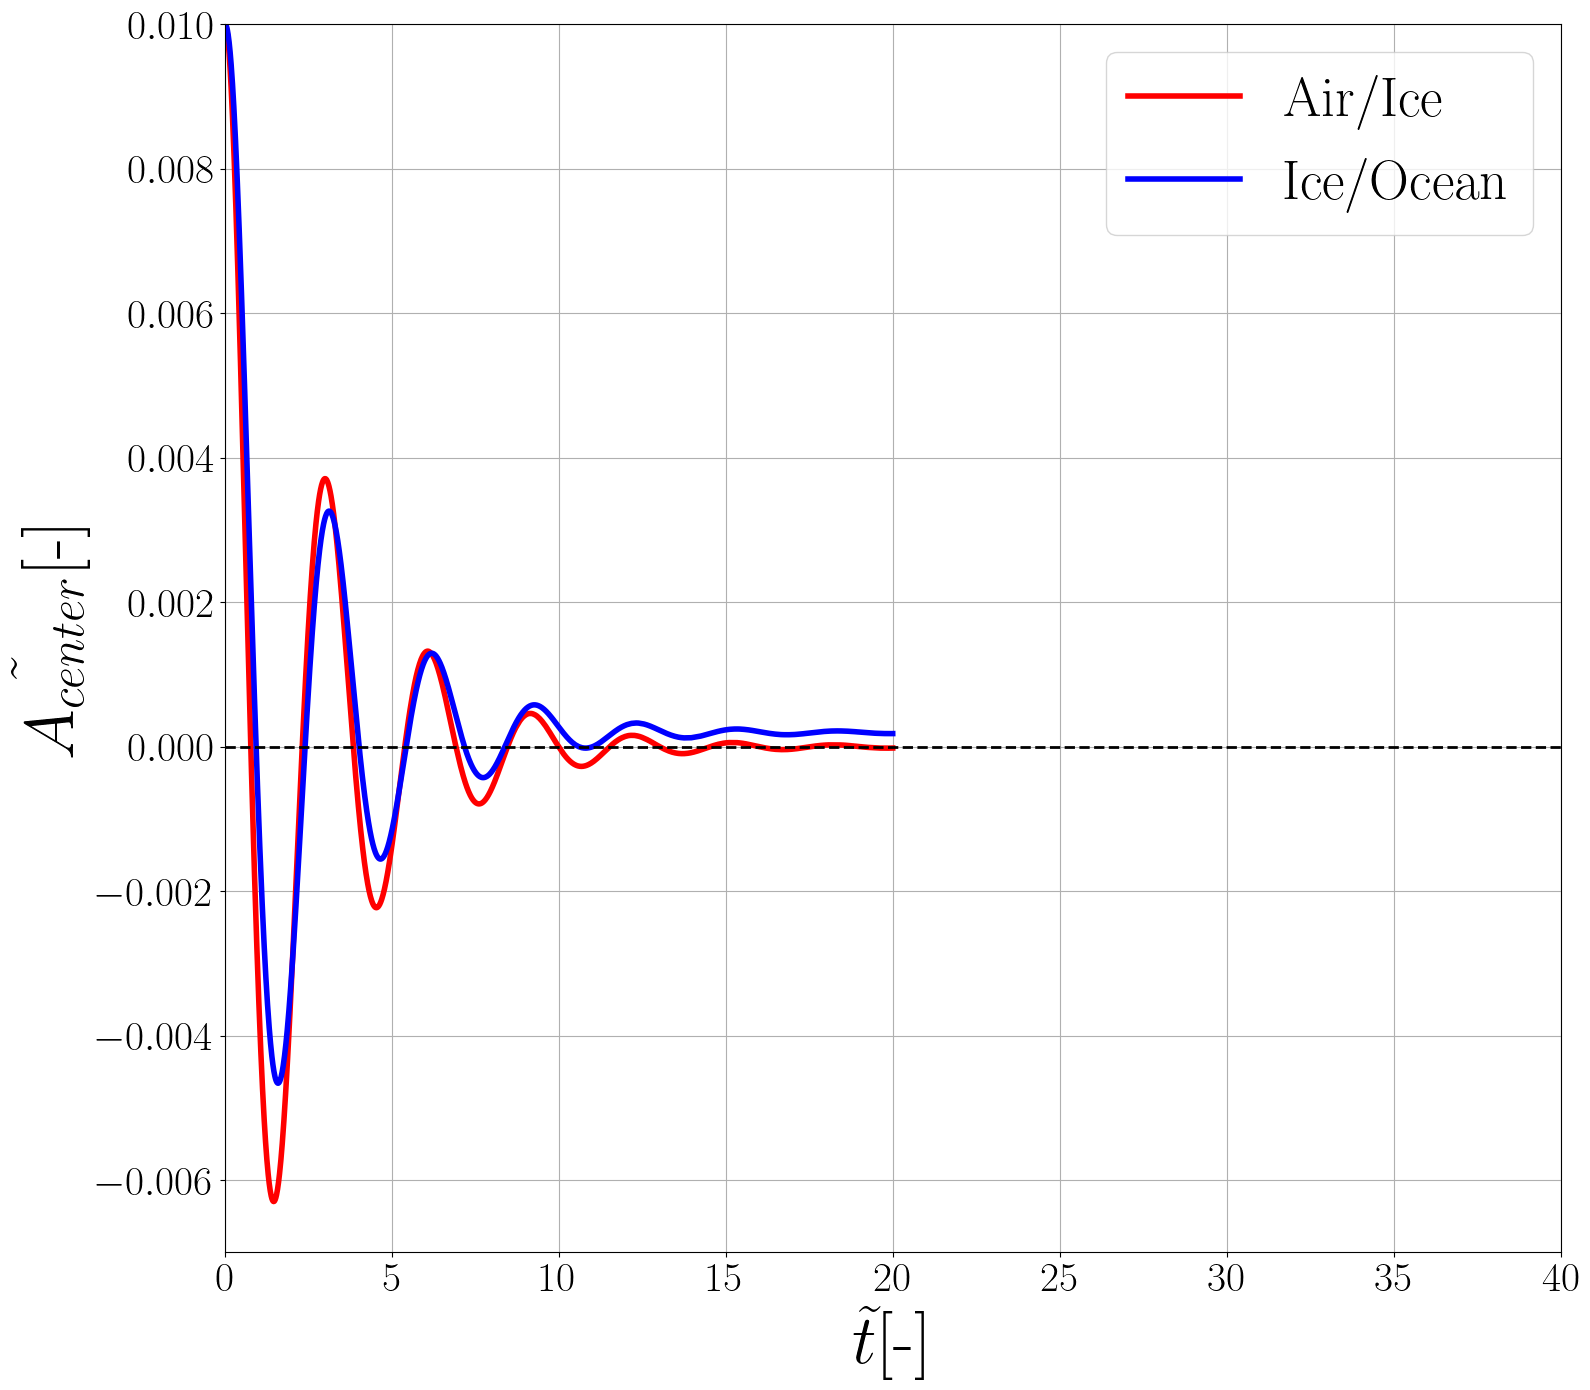

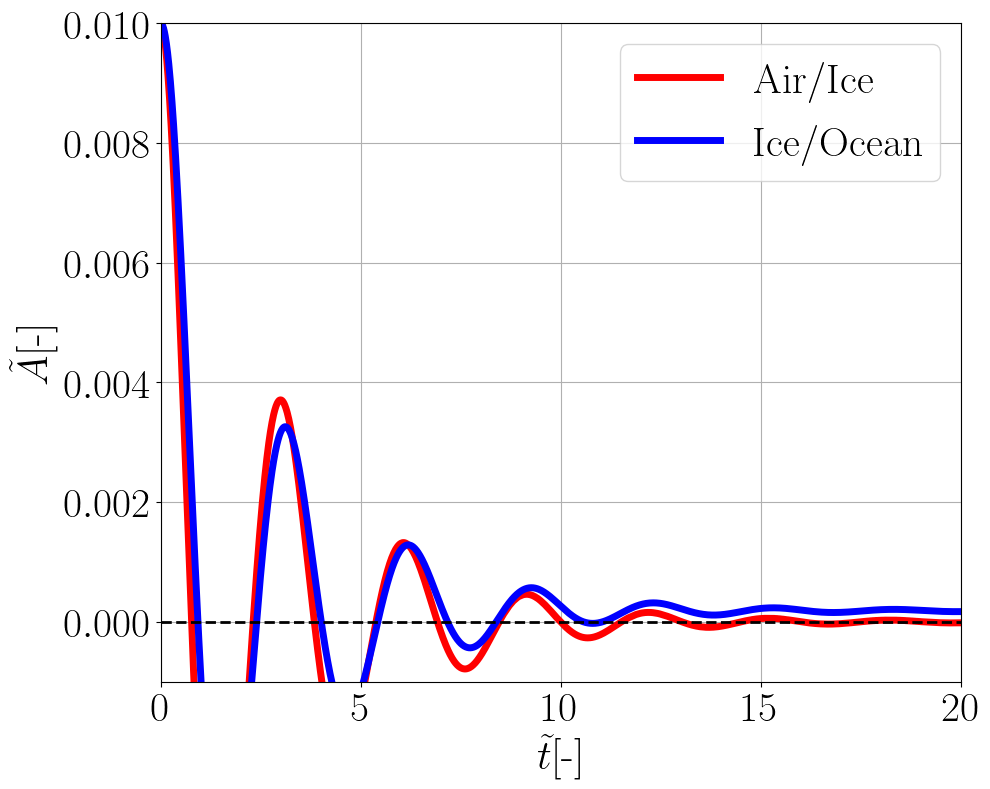

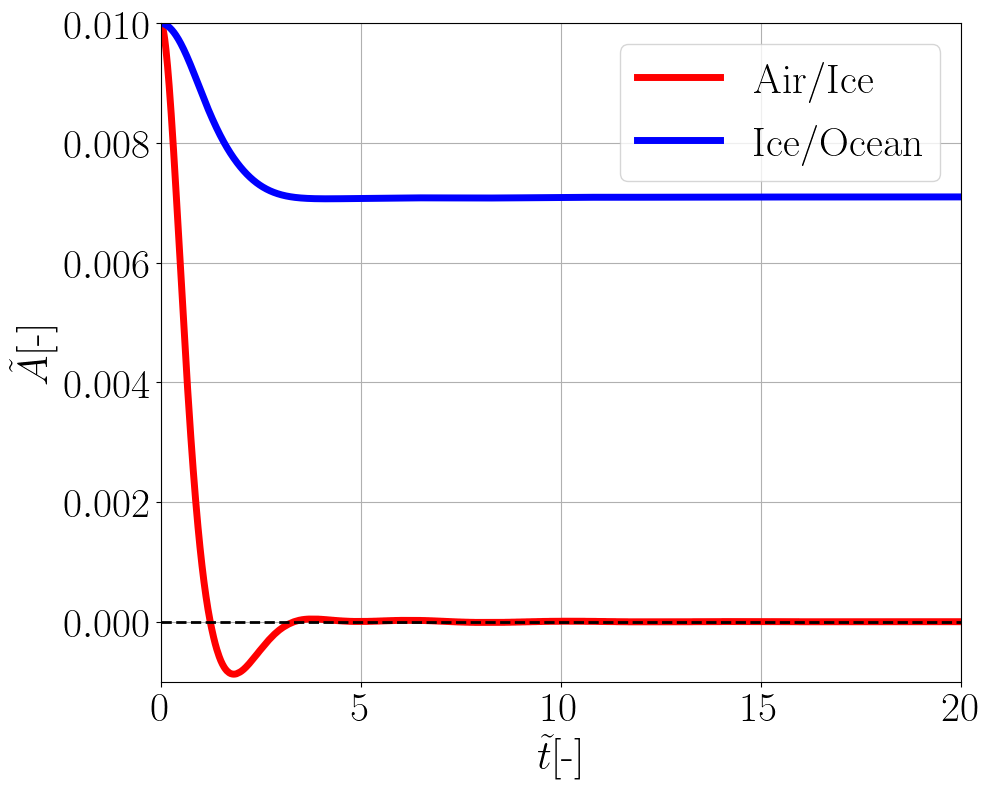

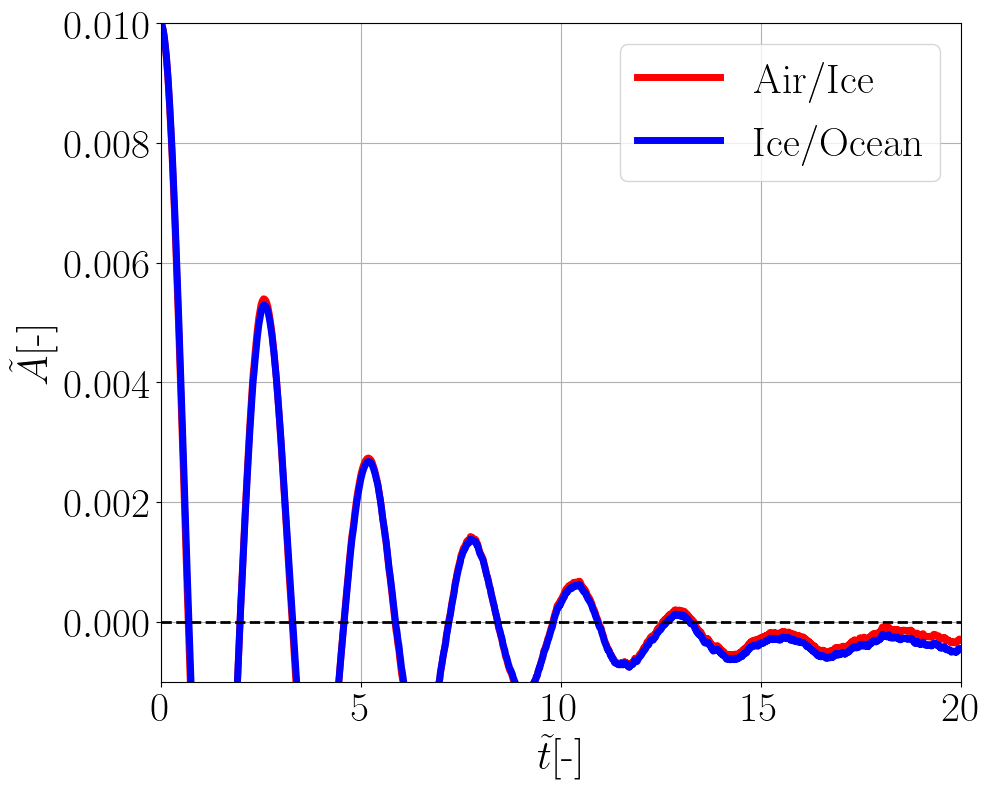

In [53]:
#Initialize variables 
folders_dt4_grid8 = [2218]

colors = ['k', 'r', 'b', 'g', 'y', 'm', 'c', 'w', 'orange', 'pink', 'purple', 'brown', 'lime', 'teal']
linestyles = ['-', '--', '-.', ':','solid']

#Extract amplitude data from simulation and plot data for different ice viscosities 
def plot_mu (folder,string):
    fig, ax = plt.subplots(1, 1, figsize=(16,14))
    for i in range(len(folder)):
        A0_Ocean, A0_Ice, t, AmpOcean, AmpIce = read_extract(f'/mnt/Valentin/ViscousOilOnWaterWaves_/{folder[i]}/center_amplitude.txt')
        ax.plot(t, AmpIce, 'r',linestyle=linestyles[0], lw=4, label='Air/Ice')
        ax.plot(t, AmpOcean, 'b',linestyle=linestyles[0], lw=4, label='Ice/Ocean')
        ax.set_xlabel(r'$\tilde{t}$[-]', fontsize=50)
        ax.set_ylabel(r'$\tilde{A_{center}}$[-]', fontsize=50)
        ax.tick_params(axis='both', which='major', labelsize=30)
        ax.set_xlim([0., 40])
        ax.set_ylim([-0.007, A0_Ice])
        ax.axhline(y=0, color='k', linestyle='--', linewidth=2)
        ax.grid(True)
    ax.legend(fontsize=40)
    #plt.title("Interface Amplitude", fontsize=25)
    plt.tight_layout()
    plt.savefig(string)
    plt.show()

def plot(folder,string):
    fig, ax = plt.subplots(1, 1, figsize=(10,8))
    for i in range(len(folder)):
        A0_Ocean, A0_Ice, t, AmpOcean, AmpIce = read_extract(f'ViscousOilOnWaterWaves_/{folder[i]}/center_amplitude.txt')
        ax.plot(t, AmpIce, 'r',linestyle=linestyles[0], lw=5, label='Air/Ice')
        ax.plot(t, AmpOcean, 'b',linestyle=linestyles[0], lw=5, label='Ice/Ocean')
        ax.set_xlabel(r'$\tilde{t}$[-]', fontsize=30)
        ax.set_ylabel(r'$\tilde{A}$[-]', fontsize=30)
        ax.tick_params(axis='both', which='major', labelsize=30)
        ax.set_xlim([0, 20])
        ax.set_ylim([-0.001, 0.01])
        ax.axhline(y=0, color='k', linestyle='--', linewidth=2)
        ax.grid(True)
    ax.legend(fontsize=30)
    #ax.legend(loc='upper left', bbox_to_anchor=(1,1),fontsize=40)
    #plt.title("Interface Amplitude", fontsize=25)
    plt.tight_layout()
    plt.savefig(string)
    plt.show()

plot_mu(folders_dt4_grid8,"Ga=1e5_UL")
folder_t40 = [2244]
plot(folder_t40,"Ga=1e5_UL_t40")
folder_t40 = [2246]
plot(folder_t40,"Ga=1e5_h05")
folder_t40 = [2240]
plot(folder_t40,"Ga=1e5_h001")

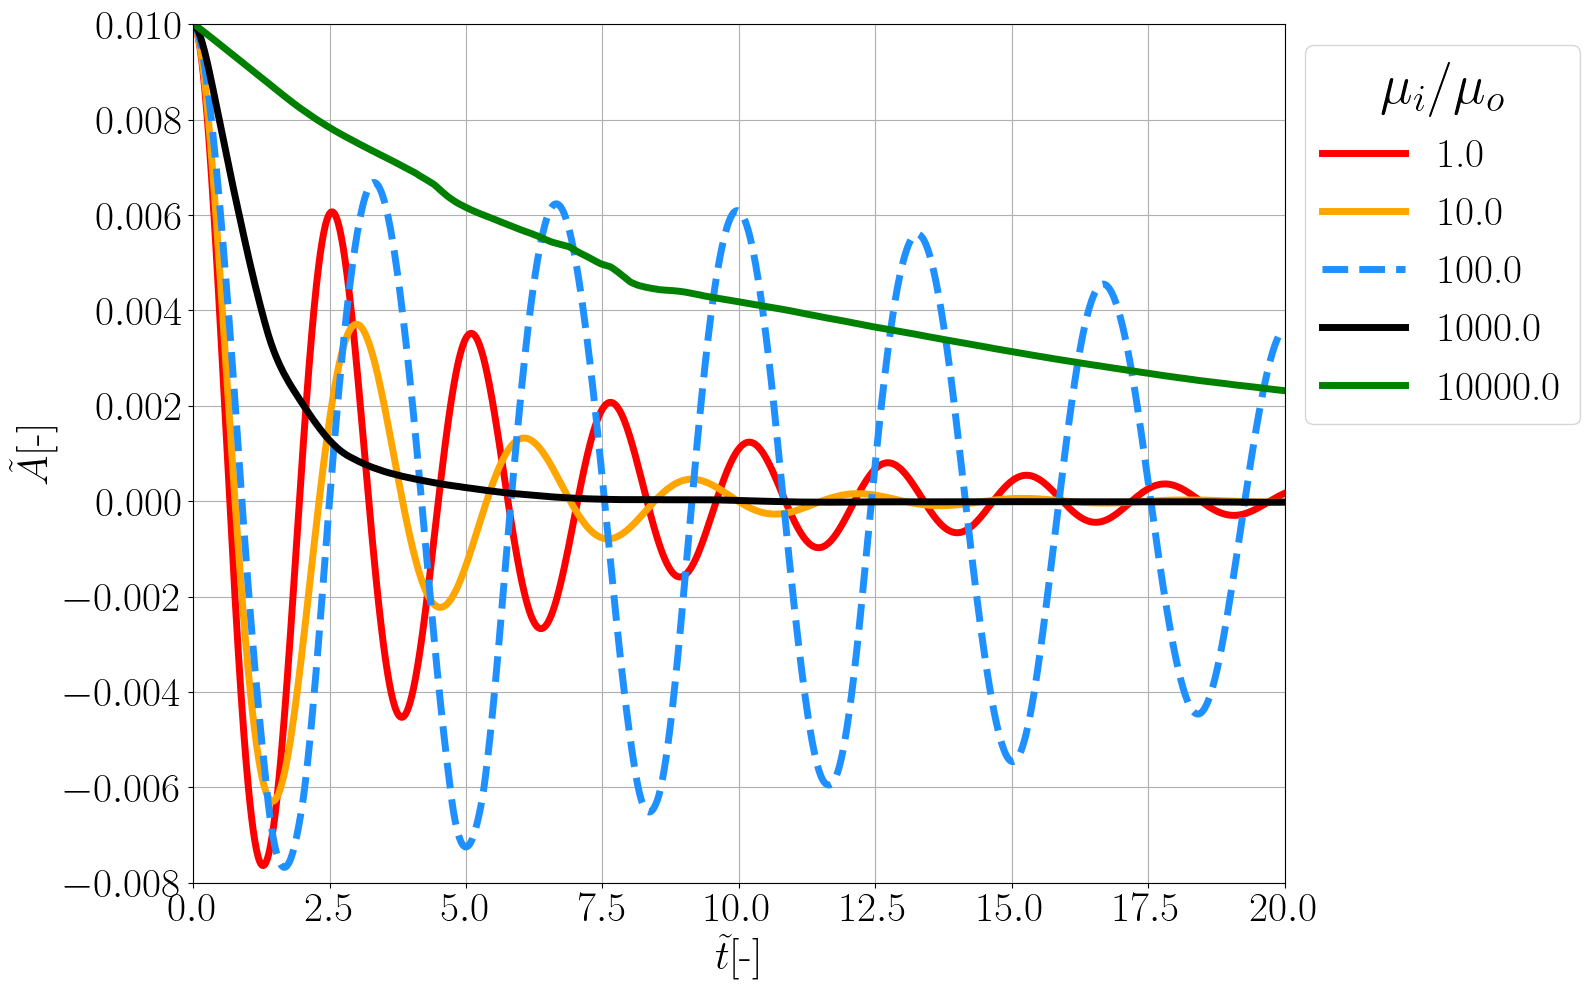

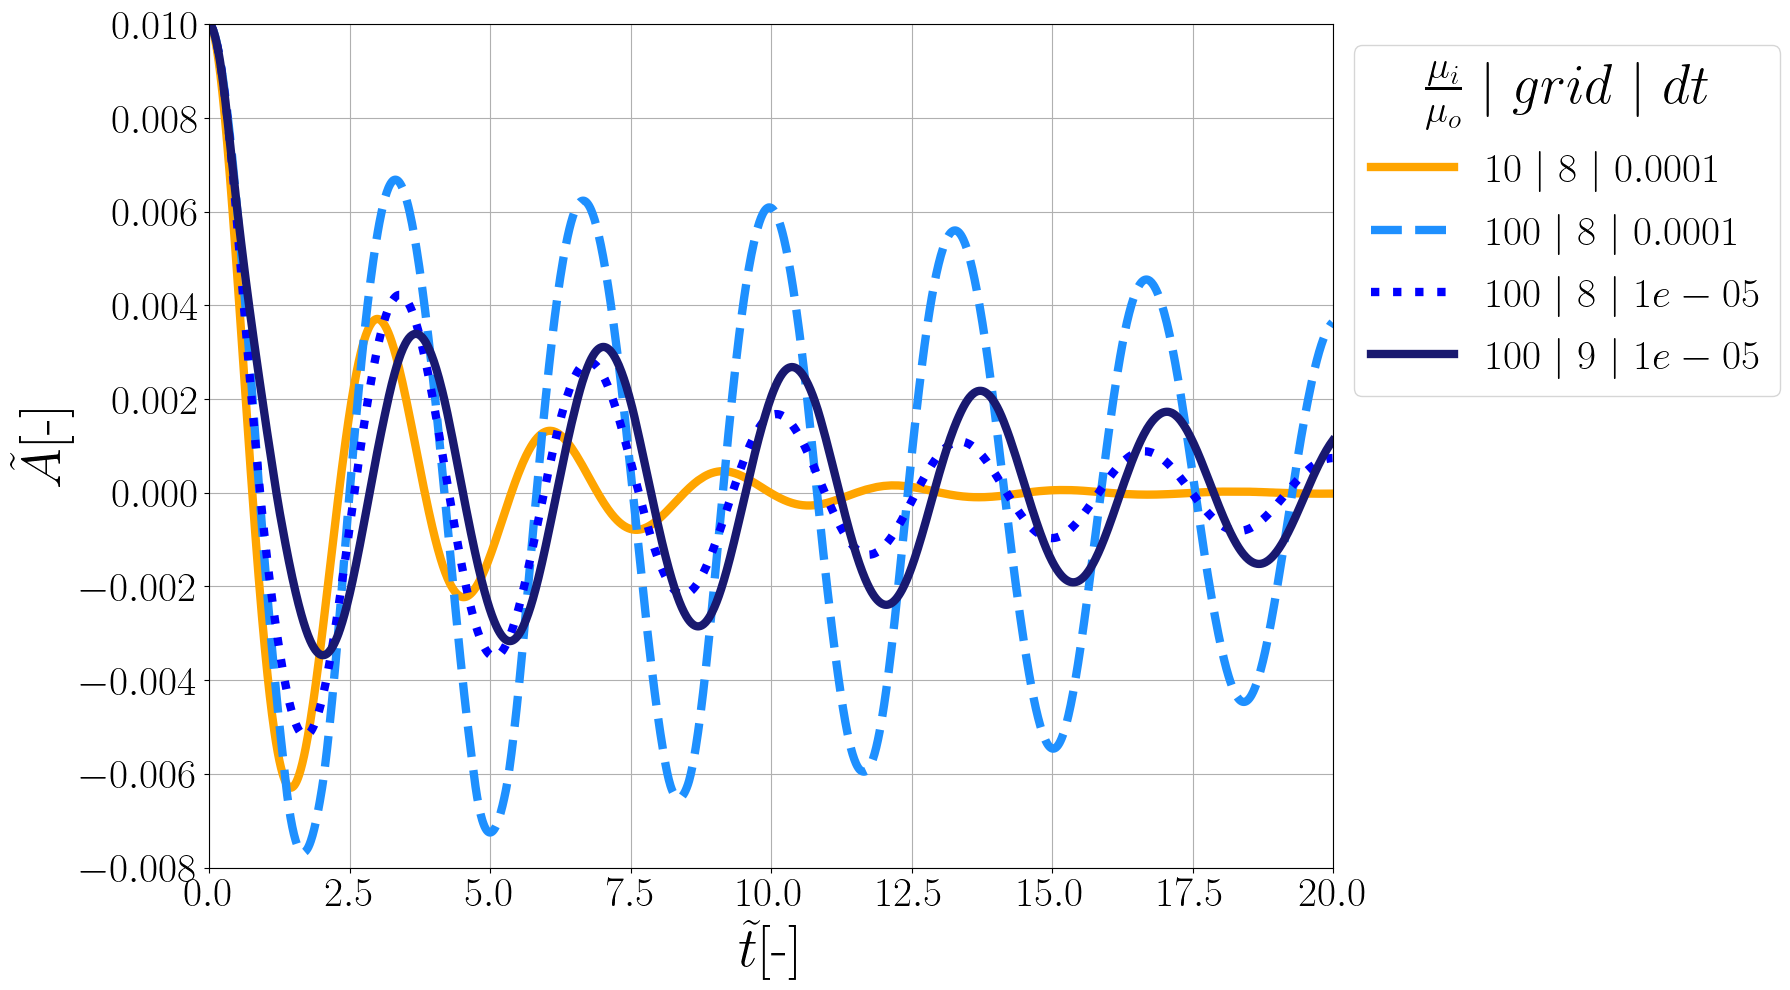

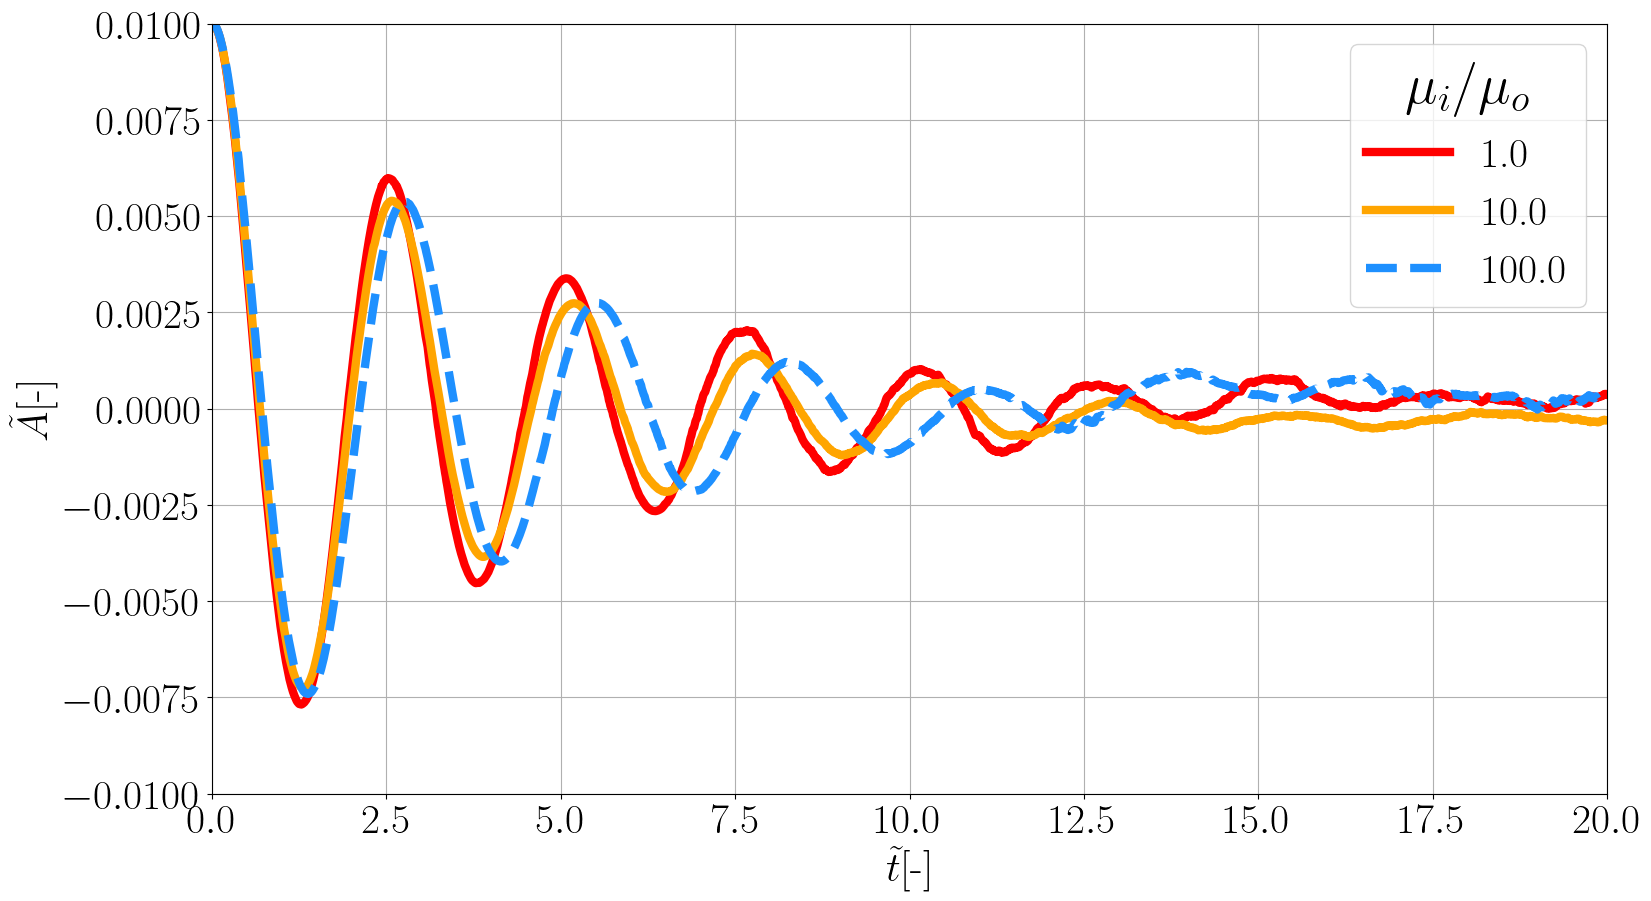

In [83]:
#Initialize variables 
#folders_dt3_grid7 = [2174,2199,2200,2201,2202]
#folders_dt4_grid7 = [2204,2205,2206,2207,2202]

colors = ['k', 'r', 'b', 'g', 'y', 'm', 'c', 'w', 'orange', 'pink', 'purple', 'brown', 'lime', 'teal']
linestyles = ['-', '--', '-.', ':','solid']

#Extract amplitude data from simulation and plot data for different ice viscosities 
def plot_mu (files, var,string):
    fig, ax = plt.subplots(1, 1, figsize=(16,10))
    for i in range(len(files)):
        A0_Ocean, A0_Ice, t, AmpOcean, AmpIce = read_extract(f'/mnt/Valentin/ViscousOilOnWaterWaves_/{files[i]}/center_amplitude.txt')
        if (i==2):
         ax.plot(t, AmpIce, colors[i],linestyle=linestyles[i], lw=5, label=str(var[i+1]))
        else:
         ax.plot(t, AmpIce, colors[i],linestyle=linestyles[i], lw=5, label=str(var[i+1]))
        ax.set_xlabel(r'$\tilde{t}$[-]', fontsize=30)
        ax.set_ylabel(r'$\tilde{A}$[-]', fontsize=30)
        ax.tick_params(axis='both', which='major', labelsize=30)
        ax.set_xlim([0., 20])
        ax.set_ylim([-0.008, 0.01 ])
        ax.grid(True)
    ax.legend(title=var[0], title_fontsize=30,fontsize=30)
    ax.legend(loc='upper left', bbox_to_anchor=(1,1),title='$\mu_i/\mu_o$', title_fontsize=40,fontsize=30)
    #plt.title("Interface Amplitude", fontsize=25)
    plt.tight_layout()
    plt.savefig(string)
    plt.show()

def plot_mu_grid (files, var,string,colors):
    fig, ax = plt.subplots(1, 1, figsize=(18,10))
    j = 0
    for i in range(len(files)):
        A0_Ocean, A0_Ice, t, AmpOcean, AmpIce = read_extract(f'/mnt/Valentin/ViscousOilOnWaterWaves_/{files[i]}/center_amplitude.txt')
        if i==0:
         ax.plot(t, AmpIce, colors[i],linestyle=linestyles[i], lw=6, label=r'${}\ |\ {}\ |\ {}$'.format(var[j], var[j+1], var[j+2]))
         j = j + 3
        else:
         ax.plot(t, AmpIce, colors[i],linestyle=linestyles[i], lw=6, label=r'${}\ |\ {}\ |\ {}$'.format(var[j], var[j+1], var[j+2]))
         j = j + 3
        ax.set_xlabel(r'$\tilde{t}$[-]', fontsize=40)
        ax.set_ylabel(r'$\tilde{A}$[-]', fontsize=40)
        ax.tick_params(axis='both', which='major', labelsize=30)
        ax.set_xlim([0., 20])
        ax.set_ylim([-0.008, A0_Ice])
        ax.grid(True)
    ax.legend(loc='upper left', bbox_to_anchor=(1,1),title=r'$\frac{\mu_i}{\mu_o}\ |\ grid\ |\ dt$', title_fontsize=40,fontsize=30)
    #plt.title("Interface Amplitude", fontsize=25)
    plt.tight_layout()
    plt.savefig(string)
    plt.show()

def plot_mu_lines (files, var,string):
    fig, ax = plt.subplots(1, 1, figsize=(18,10))
    for i in range(len(files)):
        A0_Ocean, A0_Ice, t, AmpOcean, AmpIce = read_extract(f'ViscousOilOnWaterWaves_/{files[i]}/center_amplitude.txt')
        if (i==2):
         ax.plot(t, AmpIce, colors[i],linestyle=linestyles[i], lw=6, label=str(var[i+1]))
        else:
         ax.plot(t, AmpIce, colors[i],linestyle=linestyles[i], lw=6, label=str(var[i+1]))
        ax.set_xlabel(r'$\tilde{t}$[-]', fontsize=30)
        ax.set_ylabel(r'$\tilde{A}$[-]', fontsize=30)
        ax.tick_params(axis='both', which='major', labelsize=30)
        ax.set_xlim([0., 20])
        ax.set_ylim([-0.01, 0.01 ])
        ax.grid(True)
    ax.legend(title=var[0], title_fontsize=40,fontsize=30)
    #plt.title("Interface Amplitude", fontsize=25)
    plt.savefig(string)
    plt.show()

#Plot for different dt 

colors = ['r', 'orange','dodgerblue', 'k', 'g', 'teal']
linestyles = ['-','-','--','-','-']
file_dt4g8 = [2217,2218,2219,2220,2221]
mu_IO = ['$\mu_i/\mu_o$',1e0,1e1,1e2,1e3,1e4]
plot_mu(file_dt4g8, mu_IO, "grid8_dt4_some")

colors = ['orange', 'dodgerblue', 'b', 'midnightblue', 'w', 'orange', 'pink', 'purple', 'brown', 'lime', 'teal']
#colors = ['r', 'b', 'steelblue', 'dodgerblue']
linestyles = ['-', '--', ':', 'solid']
file_mu1e2 = [2218,2219,2225,2231]
mu_IO = [10,8,1e-4,100,8,1e-4,100,8,1e-5,100,9,1e-5]
plot_mu_grid(file_mu1e2, mu_IO, "grid_change", colors)

colors = ['r', 'orange', 'dodgerblue', 'lime', 'w', 'orange', 'pink', 'purple', 'brown', 'lime', 'teal']
linestyles = ['-', '-', '--', ':']
#colors = ['k', 'r', 'b', 'g', 'y', 'm', 'c', 'w', 'orange', 'pink', 'purple', 'brown', 'lime', 'teal']
file_smallerh = [2239,2240,2241] # [2239,2240,2241,2242]
mu_IO = ['$\mu_i/\mu_o$',1e0,1e1,1e2] #['$\mu_i/\mu_o$',1e0,1e1,1e2,1e3,1e4,1e5]
plot_mu_lines(file_smallerh,mu_IO, "h001")


### Looking at the symmetric case 
We again change the viscosity of ice but,
we consider a geometry where the ice-shelf is symmetric.

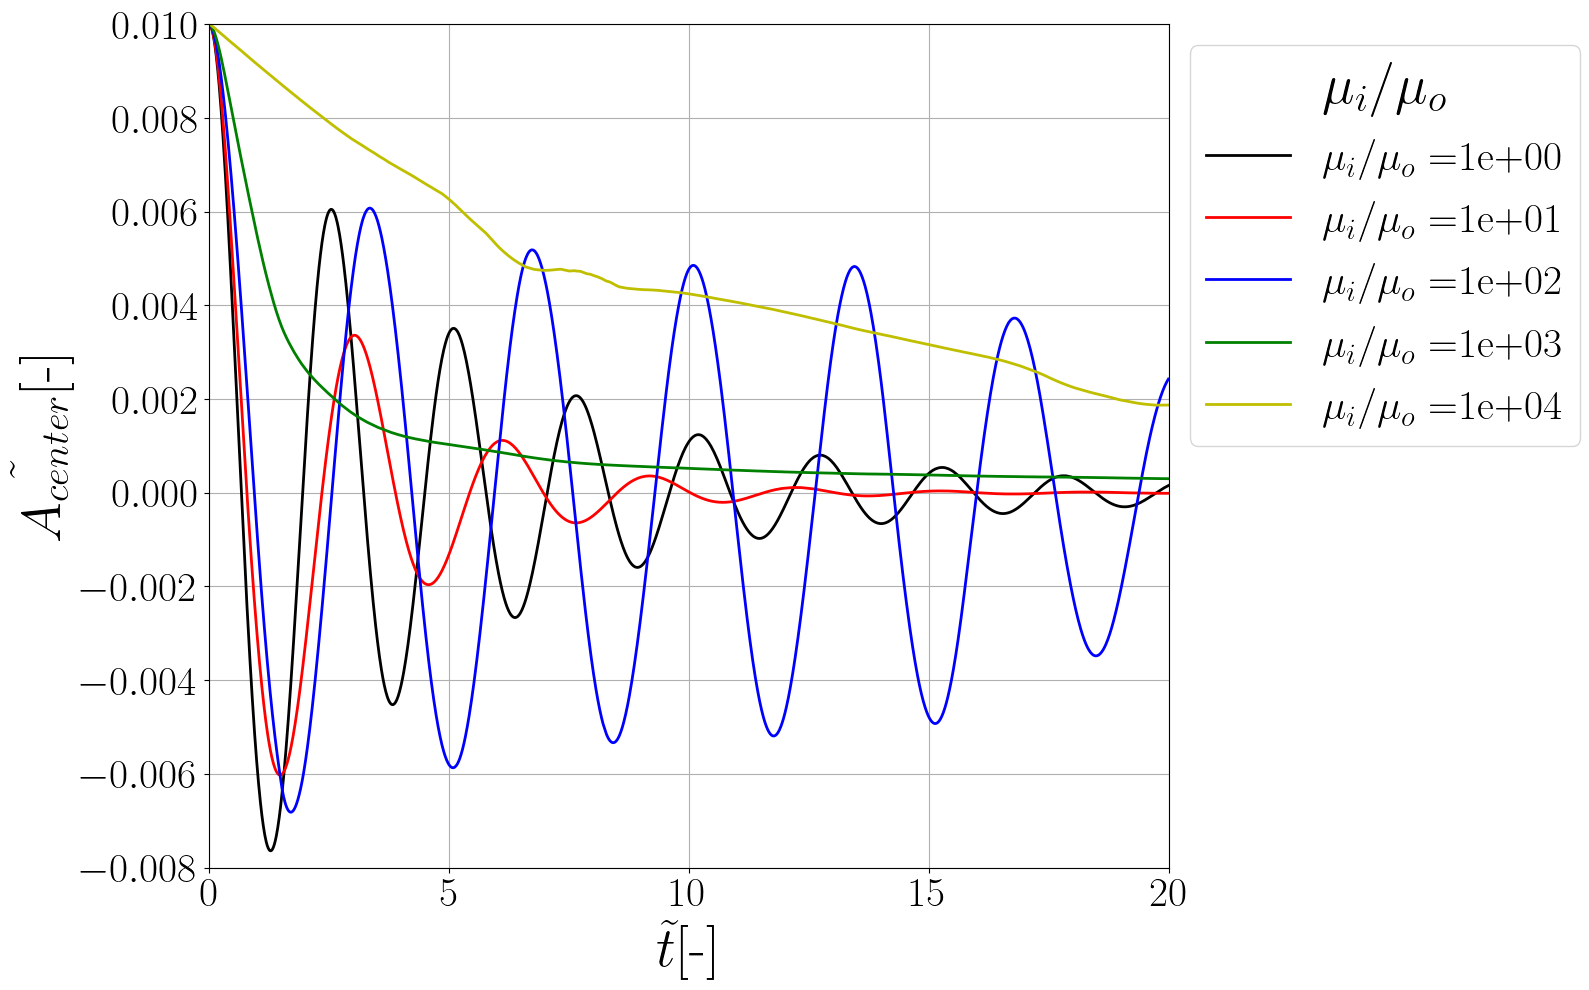

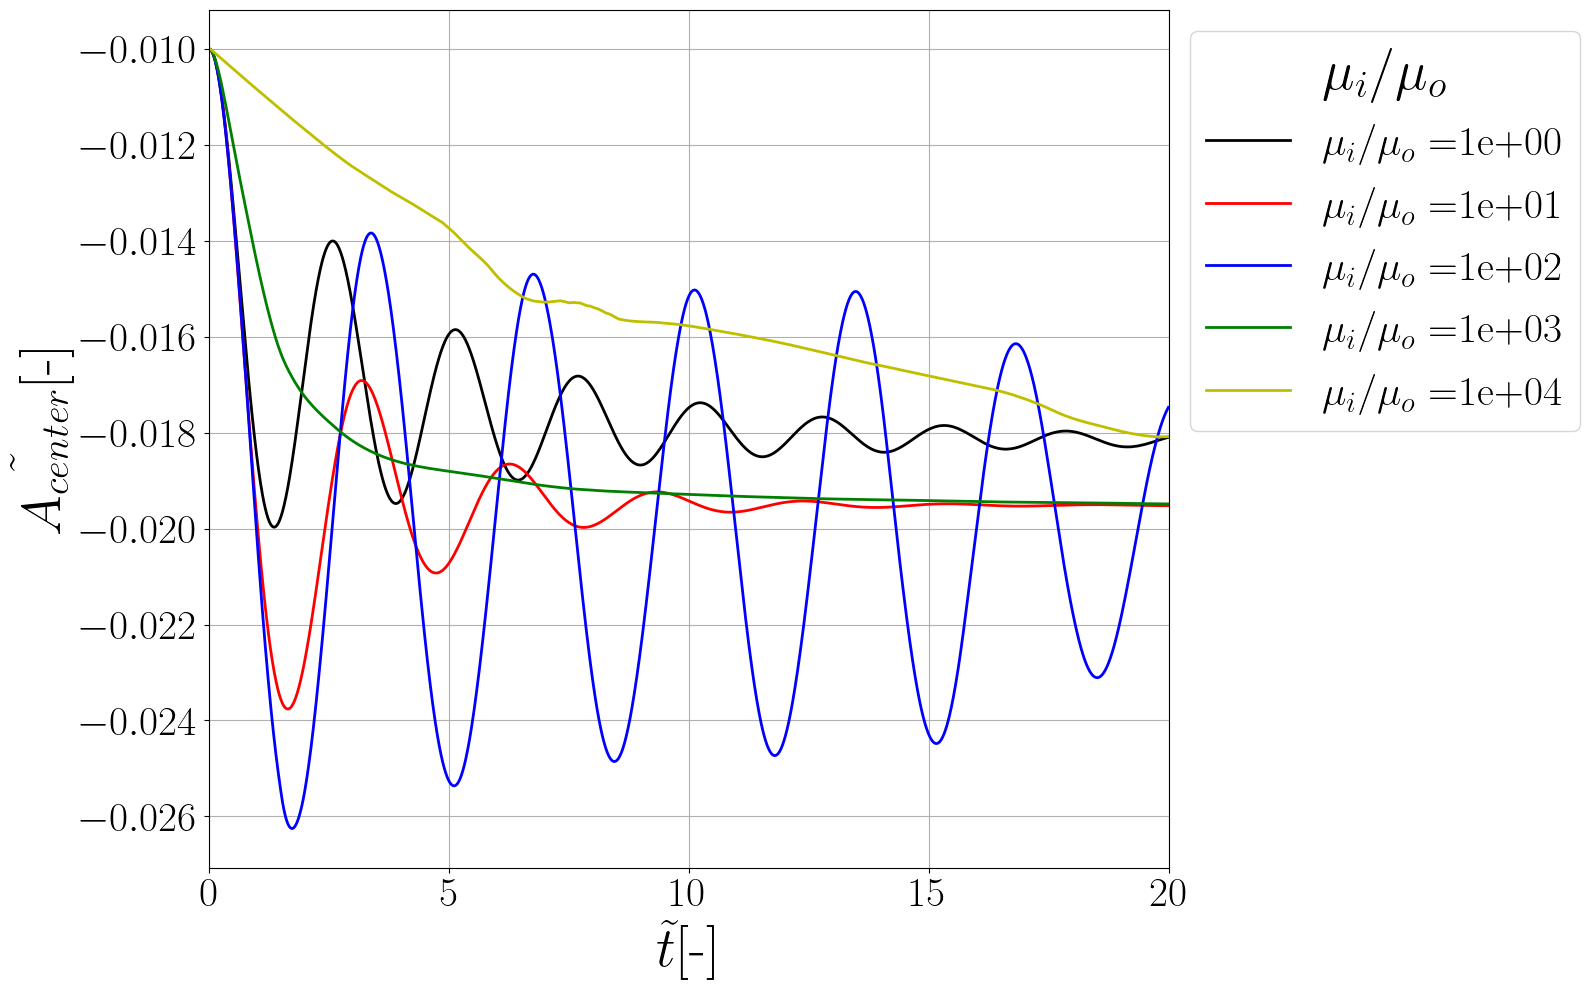

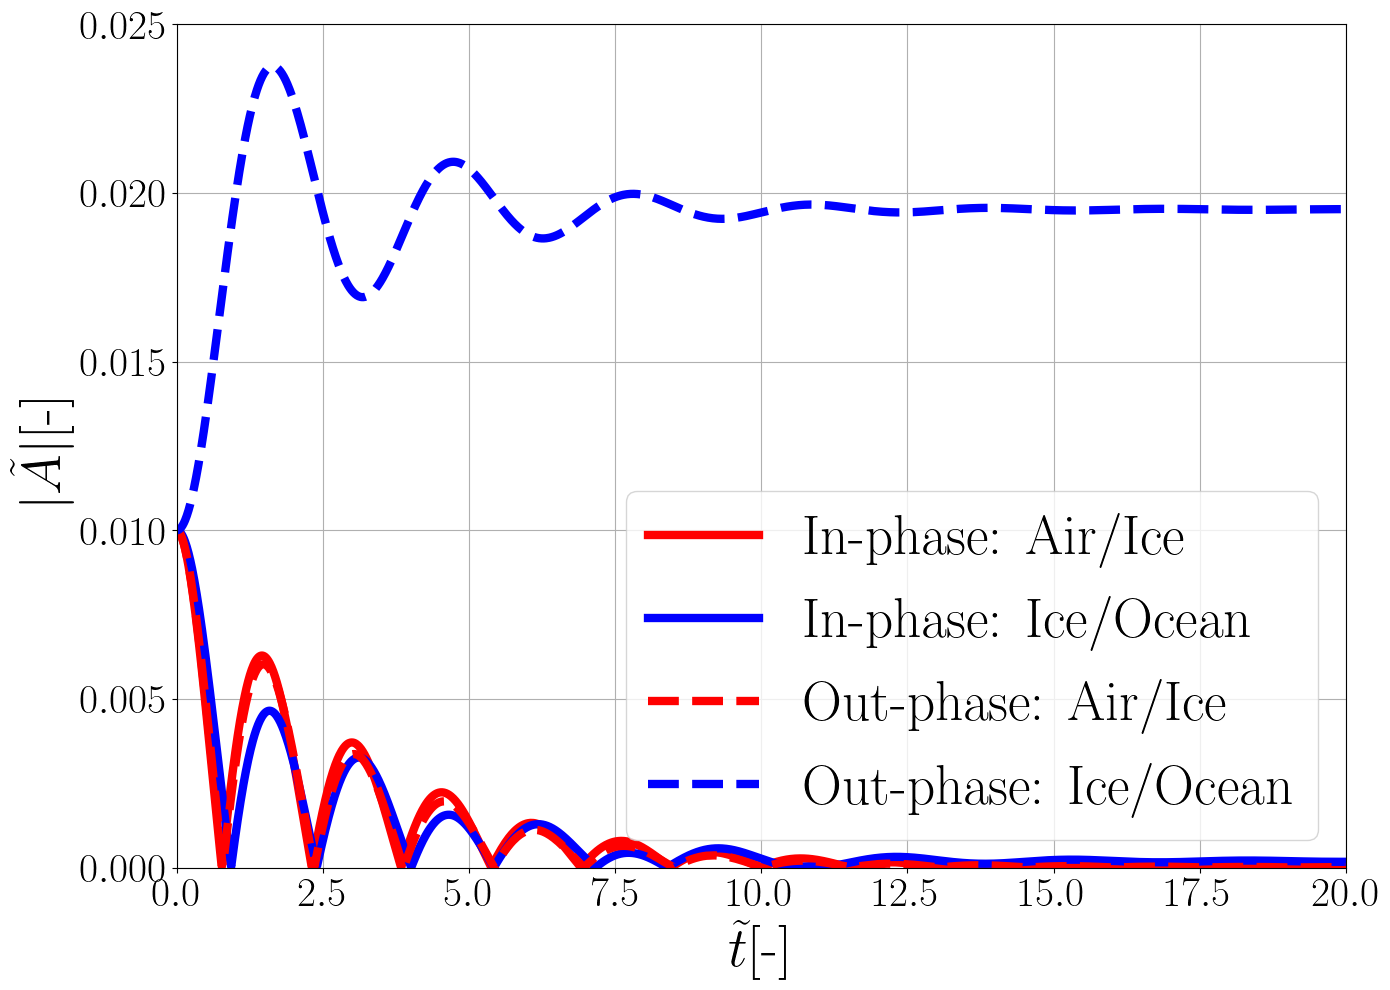

In [95]:
#Initialize variables 
mu_iceOcean = [1e0,1e1,1e2, 1e3, 1e4]
colors = ['k', 'r', 'b', 'g', 'y', 'm', 'c', 'w', 'orange', 'pink', 'purple', 'brown', 'lime', 'teal']



#Function that extracts Amplitude data from ViscousOilonWaterWaves.c, numbered folders, and plots the 
#amplitude of both interfaces as a function of time for different mu_IceOcean
def plot_mu_IceInterface (i0,iN,string):
    fig, ax = plt.subplots(1, 1, figsize=(16,10))
    for i in range(i0,iN+1):
        A0_Ocean, A0_Ice, t, AmpOcean, AmpIce = read_extract(f'/mnt/Valentin/ViscousOilOnWaterWaves_/{i}/center_amplitude.txt')
        ax.plot(t, AmpIce, colors[i-i0], lw=2, label='$\mu_i/\mu_o$ =' + '{:.0e}'.format(mu_iceOcean[i-i0]))
        ax.set_xlabel(r'$\tilde{t}$[-]', fontsize=40)
        ax.set_ylabel(r'$\tilde{A_{center}}$[-]', fontsize=40)
        ax.tick_params(axis='both', which='major', labelsize=30)
        ax.set_xlim([0., 20])
        ax.set_ylim([-0.008, 0.01])
        ax.legend()
        ax.grid(True)
    ax.legend(loc='upper left', bbox_to_anchor=(1,1),title='$\mu_i/\mu_o$', title_fontsize=40,fontsize=30)
    #plt.title("Amplitude curve")
    plt.tight_layout()
    plt.savefig(string)
    plt.show()

def plot_mu_OceanInterface (i0,iN,string):
    fig, ax = plt.subplots(1, 1, figsize=(16,10))
    for i in range(i0,iN+1):
        A0_Ocean, A0_Ice, t, AmpOcean, AmpIce = read_extract(f'/mnt/Valentin/ViscousOilOnWaterWaves_/{i}/center_amplitude.txt')
        ax.plot(t, AmpOcean, colors[i-i0], lw=2, label='$\mu_i/\mu_o$ =' + '{:.0e}'.format(mu_iceOcean[i-i0]))
        ax.set_xlabel(r'$\tilde{t}$[-]', fontsize=40)
        ax.set_ylabel(r'$\tilde{A_{center}}$[-]', fontsize=40)
        ax.tick_params(axis='both', which='major', labelsize=30)
        ax.set_xlim([0., 20])
        #ax.set_ylim([-0.008, 0.01])
        ax.legend()
        ax.grid(True)
    ax.legend(loc='upper left', bbox_to_anchor=(1,1),title='$\mu_i/\mu_o$', title_fontsize=40,fontsize=30)
    #plt.title("Amplitude curve")
    plt.tight_layout()
    plt.savefig(string)
    plt.show()




#plots for various values of Ga
plot_mu_IceInterface(2233,2237,"sym_upper")  
plot_mu_OceanInterface(2233,2237,"sym_lower") 


fig, ax = plt.subplots(1, 1, figsize=(14,10))
A0_Ocean, A0_Ice, tIn, InAmpOcean, InAmpIce = read_extract(f'ViscousOilOnWaterWaves_/{2244}/center_amplitude.txt')
A0_Ocean, A0_Ice, t, AmpOcean, AmpIce = read_extract(f'/mnt/Valentin/ViscousOilOnWaterWaves_/{2234}/center_amplitude.txt')
ax.plot(tIn, abs(InAmpIce), color='r', lw=6, label='In-phase: Air/Ice')
ax.plot(tIn, abs(InAmpOcean), color='b', lw=6, label='In-phase: Ice/Ocean')
ax.plot(t, abs(AmpIce), color='r', linestyle='--', lw=6, label='Out-phase: Air/Ice')
ax.plot(t, abs(AmpOcean), color='b',linestyle='--', lw=6, label='Out-phase: Ice/Ocean')
ax.set_xlabel(r'$\tilde{t}$[-]', fontsize=40)
ax.set_ylabel(r'$|\tilde{A}|$[-]', fontsize=40)
ax.tick_params(axis='both', which='major', labelsize=30)
ax.set_xlim([0., 20])
ax.set_ylim([0, 0.025])
ax.legend(fontsize=40)
ax.grid(True)
plt.tight_layout()
plt.savefig('Ax_sym')
plt.show()

### Decay time
Fitting an exponential decay function to the Amplitude data and finding the optimal tau.
Tau is the decay time, time it takes for the oscillations to cease.

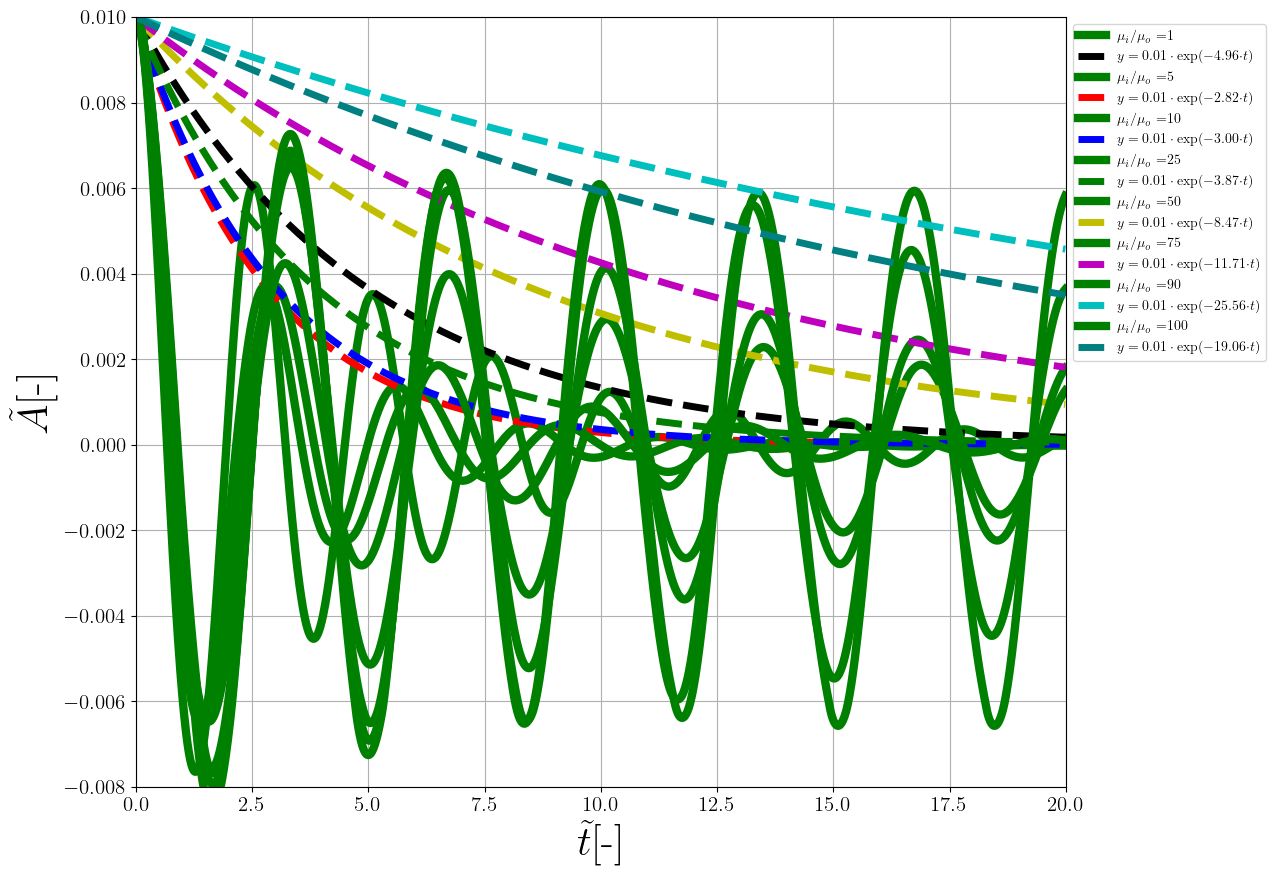

8


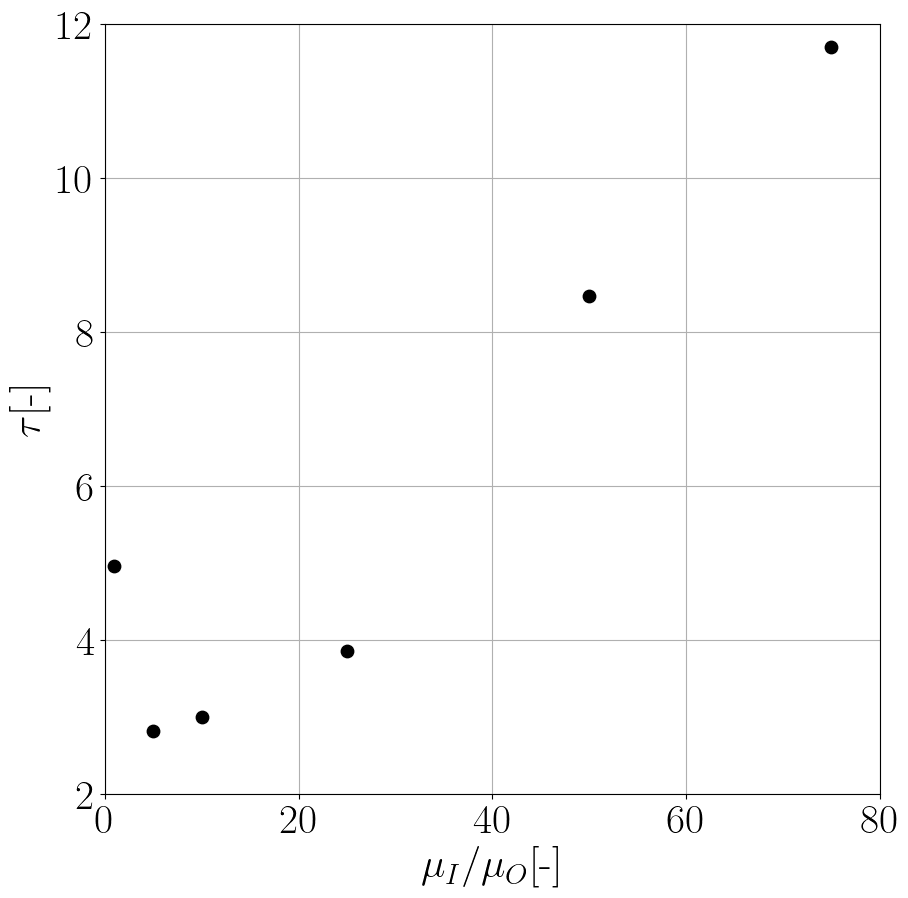

In [71]:
#Import relevant packages 
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

#Define the exponential decay
def decay_function(t, tau):
    return 0.01 * np.exp(-t / tau)

#Select peaks of Amplitude data 
def find_maxima(t,Amp):
    peaks, _ = find_peaks(Amp) #Find local maxima and create array with only the maximas 
    t_max = np.concatenate(([t[0]], t[peaks], [t[-1]]))
    Amp_max = np.concatenate(([Amp[0]], Amp[peaks], [Amp[-1]]))
    return t_max,Amp_max
    
#Find the optimal value of tau  
def optimal_tau(t_max, Amp_max):
    initial_guess_tau = 0.5
    popt, pcov = curve_fit(decay_function, t_max, Amp_max, p0=initial_guess_tau)
    tau_opt = popt[0]
    #print("Optimized parameter: tau =", tau_opt)
    return tau_opt

##Plot: Amplitude curves with the exponetial decay fit 
#Initialize variables 
mu_iceOcean = [1, 5, 10, 25, 50, 75, 90, 100]
folders_dt4 = [2217,2226, 2218, 2227, 2228, 2229, 2230, 2219]
colors = ['k', 'r', 'b', 'g', 'y', 'm', 'c','teal', 'orange', 'pink', 'purple', 'brown', 'lime', 'teal']
tau = []

#Extract amplitude data from simulation and plot data for different ice viscosities 
def plot_mu (folder,string):
    fig, ax = plt.subplots(1, 1, figsize=(12,10))
    for i in range(len(folder)):
        A0_Ocean, A0_Ice, t, AmpOcean, AmpIce = read_extract(f'/mnt/Valentin/ViscousOilOnWaterWaves_/{folder[i]}/center_amplitude.txt')
        t_max, Amp_max = find_maxima(t,AmpIce)
        tau_opt = optimal_tau(t_max, Amp_max)
        tau.append(tau_opt)
        ax.plot(t, AmpIce, 'g', lw=6, label='$\mu_i/\mu_o$ =' + str(mu_iceOcean[i]))
        ax.scatter(t_max, Amp_max, c=colors[i], s=10)
        ax.plot(t,decay_function(t,tau_opt), colors[i], lw=5, linestyle='--', label=r'$y = 0.01 \cdot \exp(-$' + '{:.2f}'.format(tau_opt)+'$ \cdot t)$')
        ax.set_xlabel(r'$\tilde{t}$[-]', fontsize=30)
        ax.set_ylabel(r'$\tilde{A}$[-]', fontsize=30)
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.set_xlim([0., 20.])
        ax.set_ylim([-0.008, A0_Ice])
        ax.legend(fontsize=30)
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
        ax.grid(True)
    #plt.title("Amplitude curve")
    plt.savefig(string)
    plt.show()

#Plot for different dt 
plot_mu(folders_dt4,"Amplitude_expdecay")

print(len(tau))

##Plot: tau as a function of mu
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.scatter(mu_iceOcean[0:6], tau[0:6], s=80, c='k')
ax.set_ylabel(r'$\tau$[-]', fontsize=30)
ax.set_xlabel(r'$\mu_I/\mu_O$[-]', fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=30)
ax.set_xlim([0., 80])
ax.set_ylim([2, 12])
#plt.title('Decay time')
ax.grid(True)
plt.savefig('Decay')
plt.show()

#Extract amplitude data from simulation and plot data for different ice viscosities 
def plot_mu (folder,string):
    fig, ax = plt.subplots(1, 1, figsize=(14,12))
    for i in range(len(folder)):
        A0_Ocean, A0_Ice, t, AmpOcean, AmpIce = read_extract(f'/mnt/Valentin/ViscousOilOnWaterWaves_/{folder[i]}/center_amplitude.txt')
        ax.plot(t, AmpIce, 'r',linestyle=linestyles[0], lw=3, label='Air/Ice')
        ax.plot(t, AmpOcean, 'b',linestyle=linestyles[0], lw=3, label='Ice/Ocean')
        ax.set_xlabel(r'$\tilde{t}$[-]', fontsize=40)
        ax.set_ylabel(r'$\tilde{A_{center}}$[-]', fontsize=40)
        ax.tick_params(axis='both', which='major', labelsize=30)
        ax.set_xlim([0., 20])
        ax.set_ylim([-0.007, A0_Ice])
        ax.axhline(y=0, color='k', linestyle='--', linewidth=2)
        ax.grid(True)
    ax.legend(fontsize=30)
    #plt.title("Interface Amplitude", fontsize=25)
    plt.tight_layout()
    plt.savefig(string)
    plt.show()

### Changing Ga

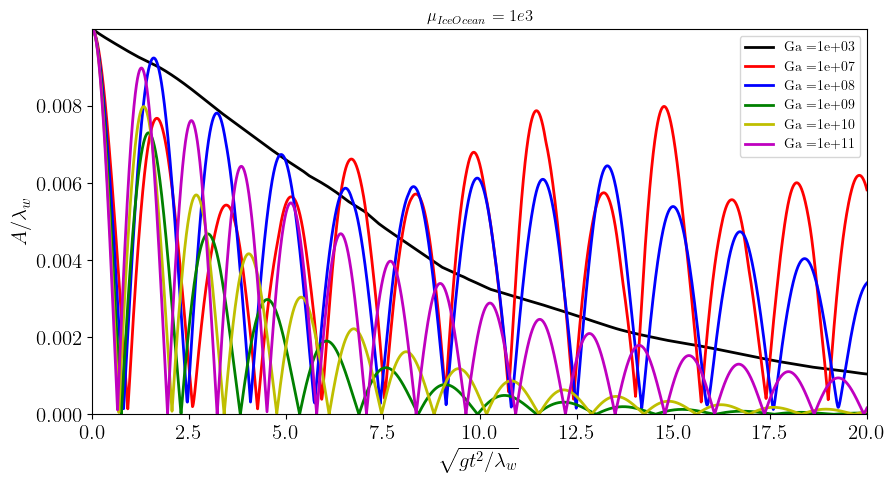

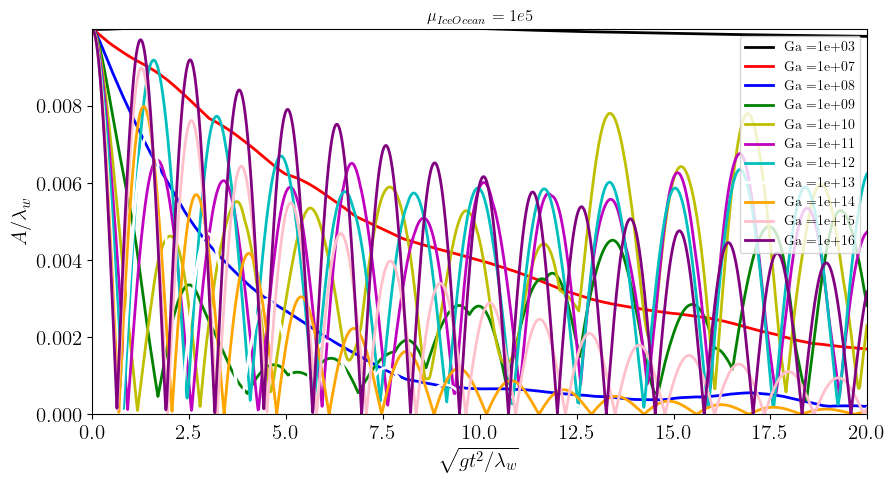

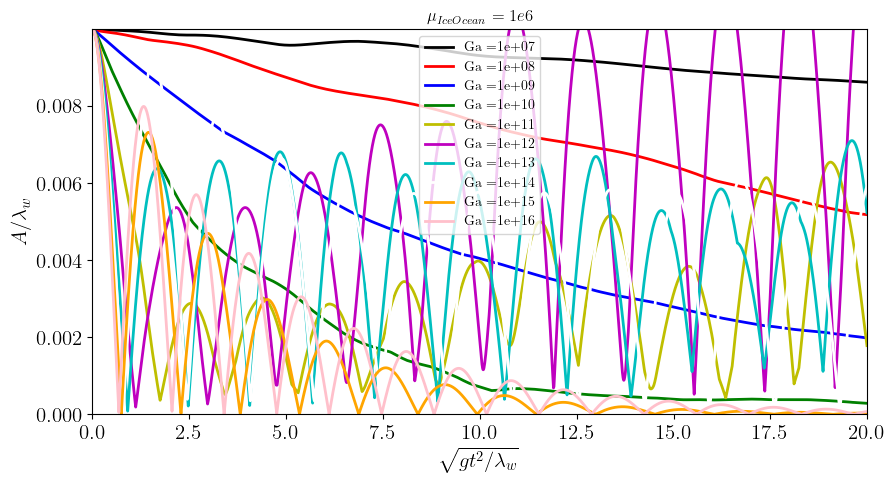

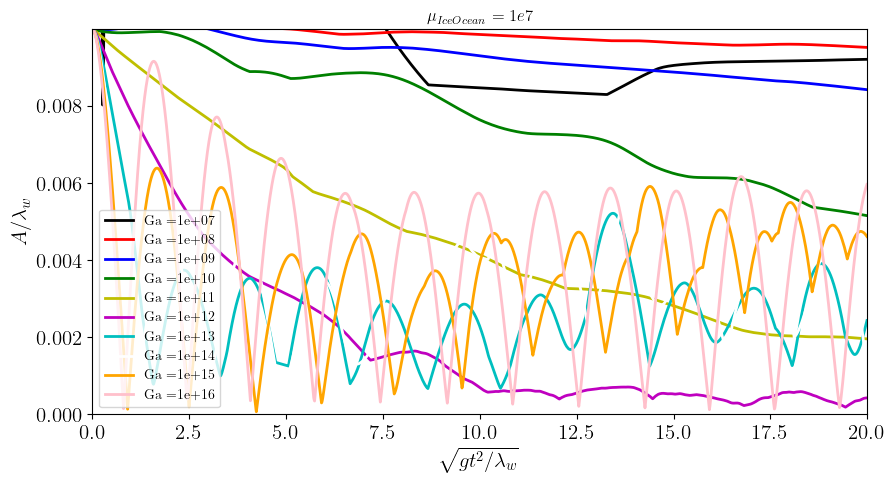

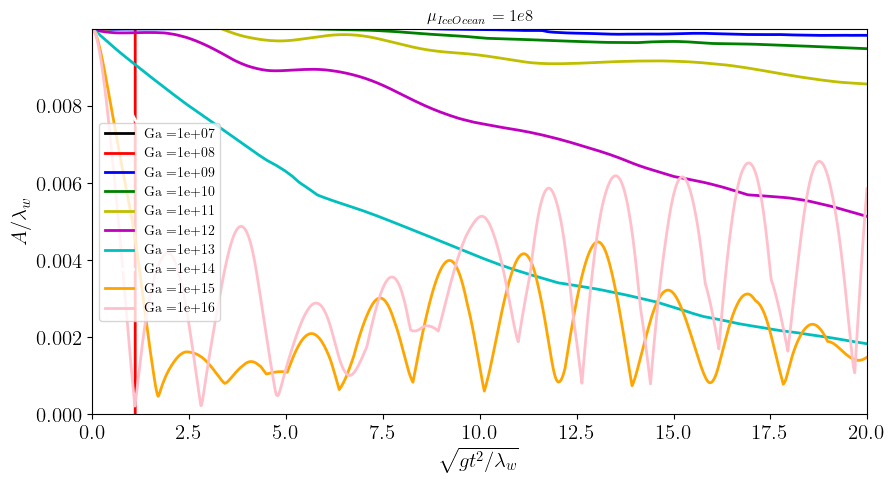

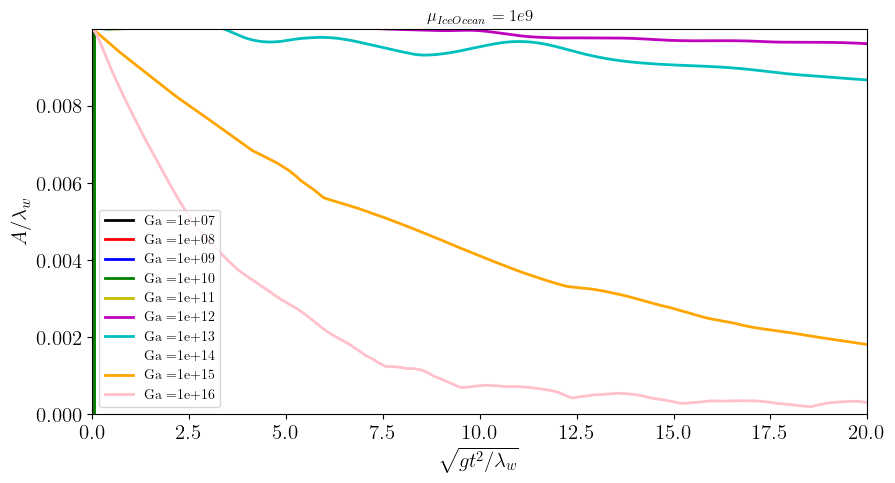

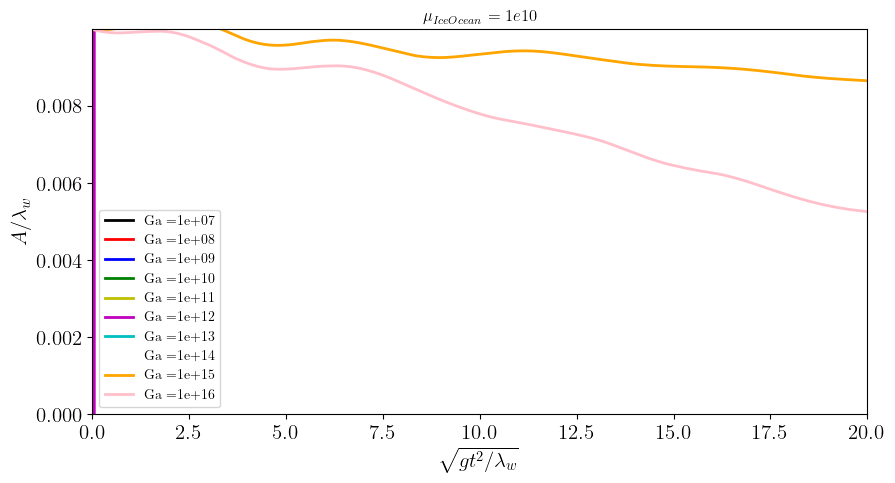

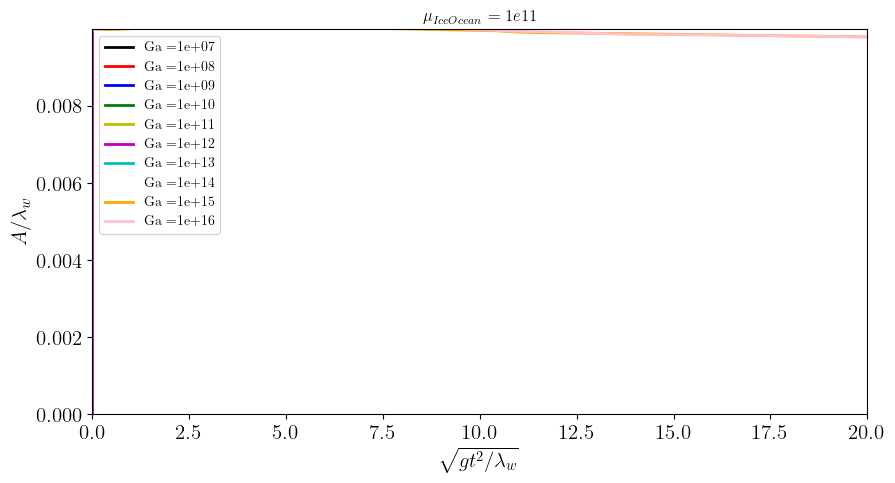

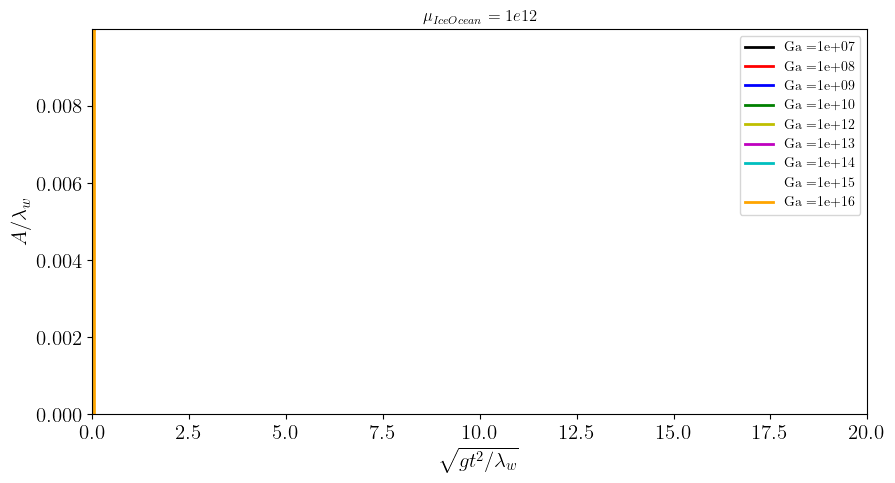

In [167]:
#Initialize variables
colors = ['k', 'r', 'b', 'g', 'y', 'm', 'c', 'w', 'orange', 'pink', 'purple', 'brown', 'lime', 'teal']

#Function that extracts Amplitude data from ViscousOilonWaterWaves.c, numbered folders, and plots the 
#amplitude of both interfaces as a function of time for different Ga
def plot_Ga (Ga,folders,string):
    fig, ax = plt.subplots(1, 1, figsize=(10,5))
    for i in range(len(folders)):
        A0_Ocean, A0_Ice, t, AmpOcean, AmpIce = read_extract(f'/mnt/Valentin/ViscousOilOnWaterWaves_/{folders[i]}/amplitude.dat')
        #ax.plot(t, AmpOcean, colors[i], lw=2, label='Ga ='+str(Ga[i]))
        ax.plot(t, AmpIce, colors[i], lw=2, label='Ga =' + '{:.0e}'.format(Ga[i]))
        ax.set_xlabel(r'$\sqrt{gt^2/\lambda_w}$', fontsize=15)
        ax.set_ylabel(r'$A/\lambda_w$', fontsize=15)
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.set_xlim([0., 20])
        ax.set_ylim([0., A0_Ice])
        ax.legend()
    plt.title(string)
    plt.savefig(string)
    plt.show()

#mu = 1e3
Ga = [1e3, 1e7, 1e8, 1e9, 1e10, 1e11]
folder = [2004, 2026, 2037, 2048, 2059, 2070] # !!!! you need to give this to every function 
plot_Ga(Ga,folder,"$\mu_{IceOcean}=1e3$")

#mu = 1e5 
Ga = [1e3, 1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14, 1e15, 1e16]
folder = [2006,2028,2039,2050,2061,2072,2083,2097,2111,2125,2139]
plot_Ga(Ga,folder,"$\mu_{IceOcean}=1e5$")

#mu = 1e6
Ga = [1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14, 1e15, 1e16]
folder = [2029,2040,2051,2062,2073,2084,2098,2112,2126,2140]
plot_Ga(Ga,folder,"$\mu_{IceOcean}=1e6$")

#mu = 1e7
Ga = [1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14, 1e15, 1e16]
folder = [2030,2041,2052,2063,2074,2085,2099,2113,2127,2141]
plot_Ga(Ga,folder,"$\mu_{IceOcean}=1e7$")

#mu = 1e8
Ga = [1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14, 1e15, 1e16]
folder = [2031,2042,2053,2064,2075,2086,2100,2114,2128,2142]
plot_Ga(Ga,folder,"$\mu_{IceOcean}=1e8$")

#mu = 1e9
Ga = [1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14, 1e15, 1e16]
folder = [2032,2043,2054,2065,2076,2087,2101,2115,2129,2143]
plot_Ga(Ga,folder,"$\mu_{IceOcean}=1e9$")

#mu = 1e10
Ga = [1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14, 1e15, 1e16]
folder = [2033,2044,2055,2066,2077,2088,2102,2116,2130,2144]
plot_Ga(Ga,folder,"$\mu_{IceOcean}=1e10$")

#mu = 1e11
Ga = [1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14, 1e15, 1e16]
folder = [2034,2045,2056,2067,2078,2089,2103,2117,2131,2145]
plot_Ga(Ga,folder,"$\mu_{IceOcean}=1e11$")

#mu = 1e12
Ga = [1e7, 1e8, 1e9, 1e10, 1e12, 1e13, 1e14, 1e15, 1e16]
folder = [2035,2046,2057,2068,2090,2104,2118,2132,2146]
plot_Ga(Ga,folder,"$\mu_{IceOcean}=1e12$")

### Changing Grid

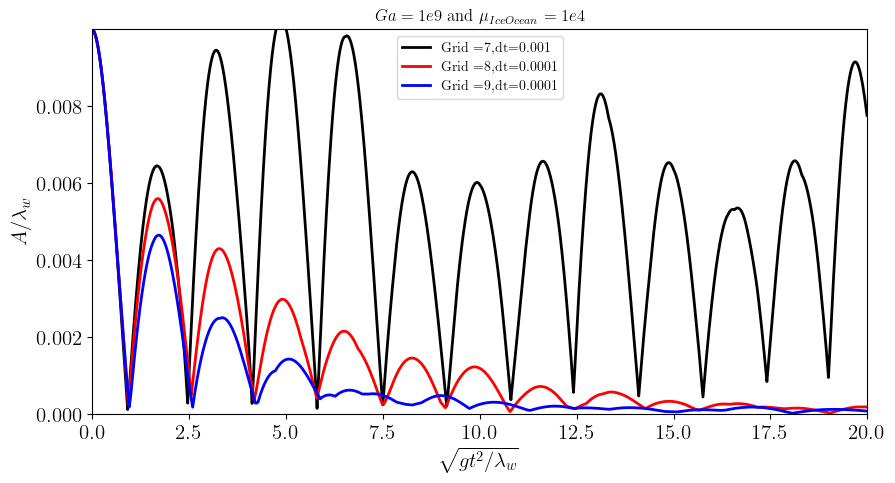

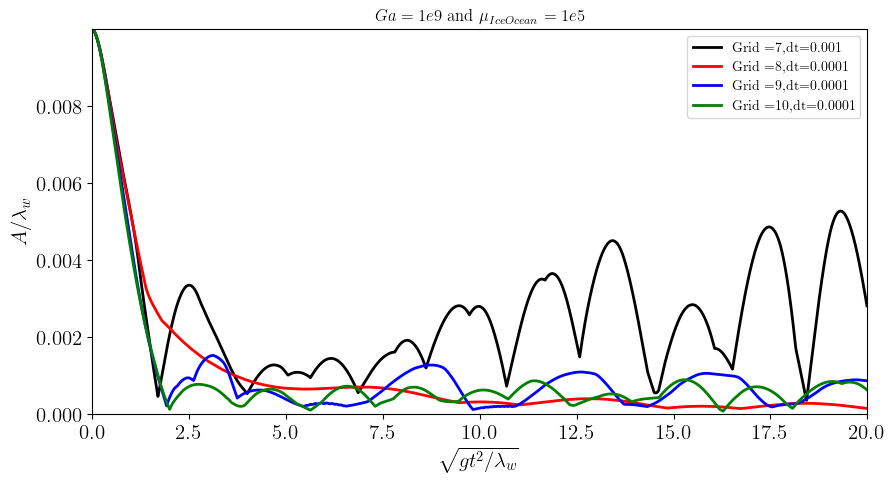

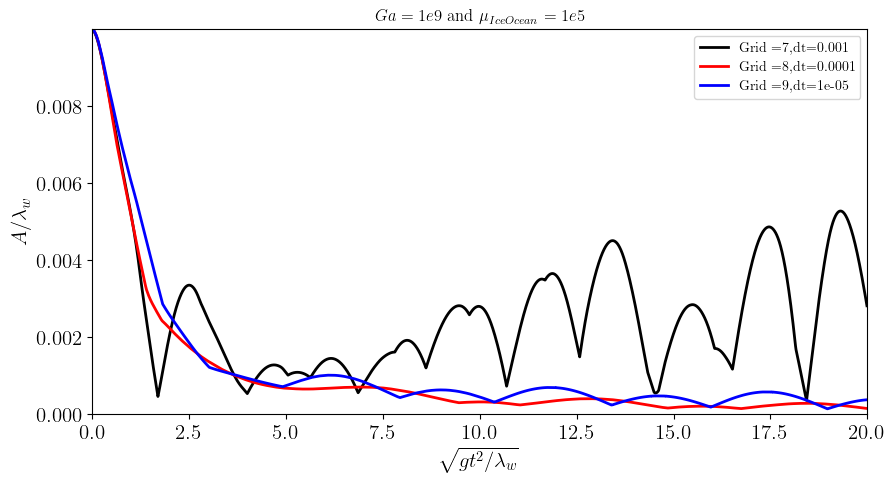

In [169]:
#Initialize variables
colors = ['k', 'r', 'b', 'g', 'y', 'm', 'c', 'w', 'orange', 'pink', 'purple', 'brown', 'lime', 'teal']

#plot Grid level
folders = [2049, 2150, 2151]  # Example file_index list
grid= [7,8,9]
dt = [1e-3,1e-4,1e-4]
fig, ax = plt.subplots(1, 1, figsize=(10,5))
for i in range(len(folders)):
    A0_Ocean, A0_Ice, t, AmpOcean, AmpIce = read_extract(f'/mnt/Valentin/ViscousOilOnWaterWaves_/{folders[i]}/amplitude.dat')
    #ax.plot(t, AmpOcean, colors[i], lw=2, label='Grid ='+str(grid[i]))
    ax.plot(t, AmpIce, colors[i], lw=2, label='Grid =' + format(grid[i])+',dt='+format(dt[i]))
    ax.set_xlabel(r'$\sqrt{gt^2/\lambda_w}$', fontsize=15)
    ax.set_ylabel(r'$A/\lambda_w$', fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_xlim([0., 20])
    ax.set_ylim([0., A0_Ice])
    ax.legend()
plt.title("$Ga=1e9$ and $\mu_{IceOcean}=1e4$")
plt.savefig("$Ga=1e9$ and $\mu_{IceOcean}=1e4$")
plt.show()

folders = [2050, 2152, 2153,2154]  # Example file_index list
grid= [7,8,9,10]
dt = [1e-3,1e-4,1e-4,1e-4]
fig, ax = plt.subplots(1, 1, figsize=(10,5))
for i in range(len(folders)):
    A0_Ocean, A0_Ice, t, AmpOcean, AmpIce = read_extract(f'/mnt/Valentin/ViscousOilOnWaterWaves_/{folders[i]}/amplitude.dat')
    #ax.plot(t, AmpOcean, colors[i], lw=2, label='Grid ='+str(grid[i]))
    ax.plot(t, AmpIce, colors[i], lw=2, label='Grid =' + format(grid[i])+',dt='+format(dt[i]))
    ax.set_xlabel(r'$\sqrt{gt^2/\lambda_w}$', fontsize=15)
    ax.set_ylabel(r'$A/\lambda_w$', fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_xlim([0., 20])
    ax.set_ylim([0., A0_Ice])
    ax.legend()
plt.title("$Ga=1e9$ and $\mu_{IceOcean}=1e5$")
#plt.savefig("$Ga=1e9$ and $\mu_{IceOcean}=1e5$")
plt.show()

folders = [2050, 2152, 2156]  # Example file_index list
grid= [7,8,9]
dt = [1e-3,1e-4,1e-5]
fig, ax = plt.subplots(1, 1, figsize=(10,5))
for i in range(len(folders)):
    A0_Ocean, A0_Ice, t, AmpOcean, AmpIce = read_extract(f'/mnt/Valentin/ViscousOilOnWaterWaves_/{folders[i]}/amplitude.dat')
    #ax.plot(t, AmpOcean, colors[i], lw=2, label='Grid ='+str(grid[i]))
    ax.plot(t, AmpIce, colors[i], lw=2, label='Grid =' + format(grid[i])+',dt='+format(dt[i]))
    ax.set_xlabel(r'$\sqrt{gt^2/\lambda_w}$', fontsize=15)
    ax.set_ylabel(r'$A/\lambda_w$', fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_xlim([0., 20])
    ax.set_ylim([0., A0_Ice])
    ax.legend()
plt.title("$Ga=1e9$ and $\mu_{IceOcean}=1e5$")
#plt.savefig("$Ga=1e9$ and $\mu_{IceOcean}=1e5$")
plt.show()


# ViscoElastic

## Comparing VE to Bare
I'm testing to see if VE code for E=0 is the same as oil case and the same as bare case

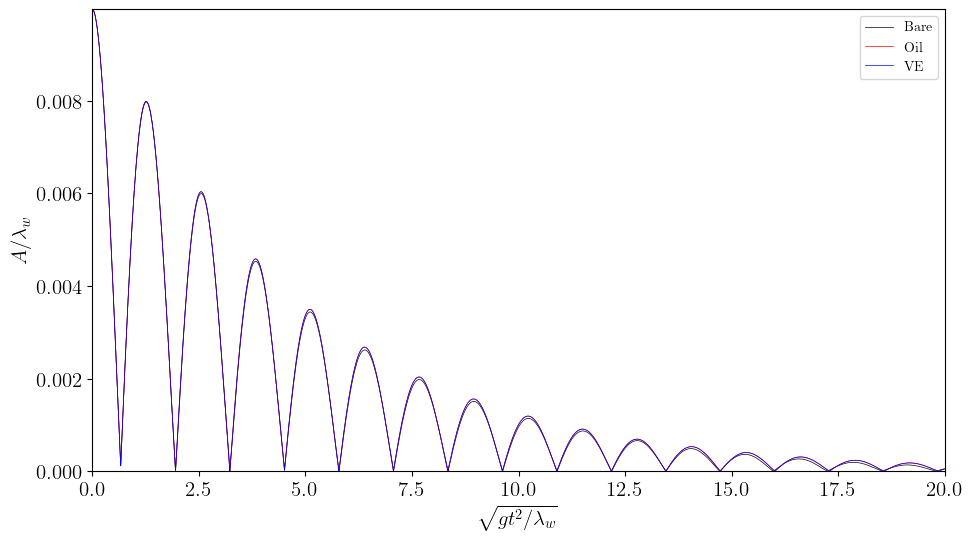

In [35]:
#Set figure
fig, ax = plt.subplots(1, 1, figsize=(11,6))

#Extract data
A0, t, Amp = read_extract(f'/mnt/Valentin/WavesWater_/{1011}/amplitude.dat') #Oil
A0_Ocean, A0_Ice, tOil, AmpOcean, AmpIce = read_extract(f'/mnt/Valentin/ViscousOilOnWaterWaves_/{2174}/amplitude.dat') #Oil
A0_OceanVE, A0_IceVE, tVE, AmpOceanVE, AmpIceVE = read_extract(f'IceOnWaterWaves_/{3037}/amplitude.dat') #VE

#Plot and parameters
ax.plot(t, Amp, colors[0], lw=0.5, label='Bare')
ax.plot(tOil, AmpIce, colors[1], lw=0.5, label='Oil')
ax.plot(t, AmpIceVE, colors[2], lw=0.5, label='VE')
ax.set_xlabel(r'$\sqrt{gt^2/\lambda_w}$', fontsize=15)
ax.set_ylabel(r'$A/\lambda_w$', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlim([0., 20])
ax.set_ylim([0., A0_Ice])
ax.legend()
#plt.title("Comparison_VE_Oil")
plt.savefig("Comparison_VE_all")
plt.show()

## Comparing VE to Oil
Using E=0 for VE, the amplitude curve should be the same. We take Ga=1e5 and mu=1e1 

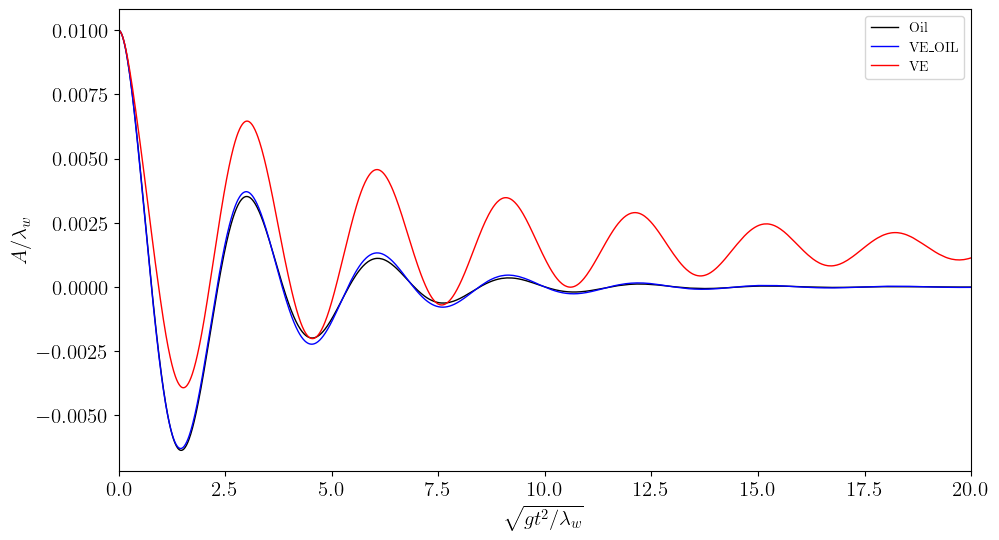

In [53]:
#Set figure
fig, ax = plt.subplots(1, 1, figsize=(11,6))



A0_Ocean, A0_Ice, t, AmpOcean, AmpIce = read_extract(f'ViscousOilOnWaterWaves_/{2199}/center_amplitude.txt') #Oil
A0_OceanVE, A0_IceVE, tVE0, AmpOceanVE, AmpIceVE0 = read_extract(f'IceOnWaterWaves_/{3054}/center_amplitude.txt') #VE
A0_OceanVE, A0_IceVE, tVE, AmpOceanVE, AmpIceVE = read_extract(f'IceOnWaterWaves_/{3058}/center_amplitude.txt') #VE

#Plot and parameters
ax.plot(t, AmpIce, colors[0], lw=1, label='Oil')
ax.plot(tVE0, AmpIceVE0, colors[2], lw=1, label='VE_OIL')
ax.plot(tVE, AmpIceVE, colors[1], lw=1, label='VE')
ax.set_xlabel(r'$\sqrt{gt^2/\lambda_w}$', fontsize=15)
ax.set_ylabel(r'$A/\lambda_w$', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlim([0., 20.0])
#ax.set_ylim([0., A0_Ice])
ax.legend()
#plt.title("Comparison_VE_Oil")
plt.savefig("Comparison_VE_Oil")
plt.show()

#[0,1e-5,1e-3,0.1,0.5,1,2,5,7,10]
#[3054,3051,3052,3053,3058,3059,3060,3061,3062,3055]




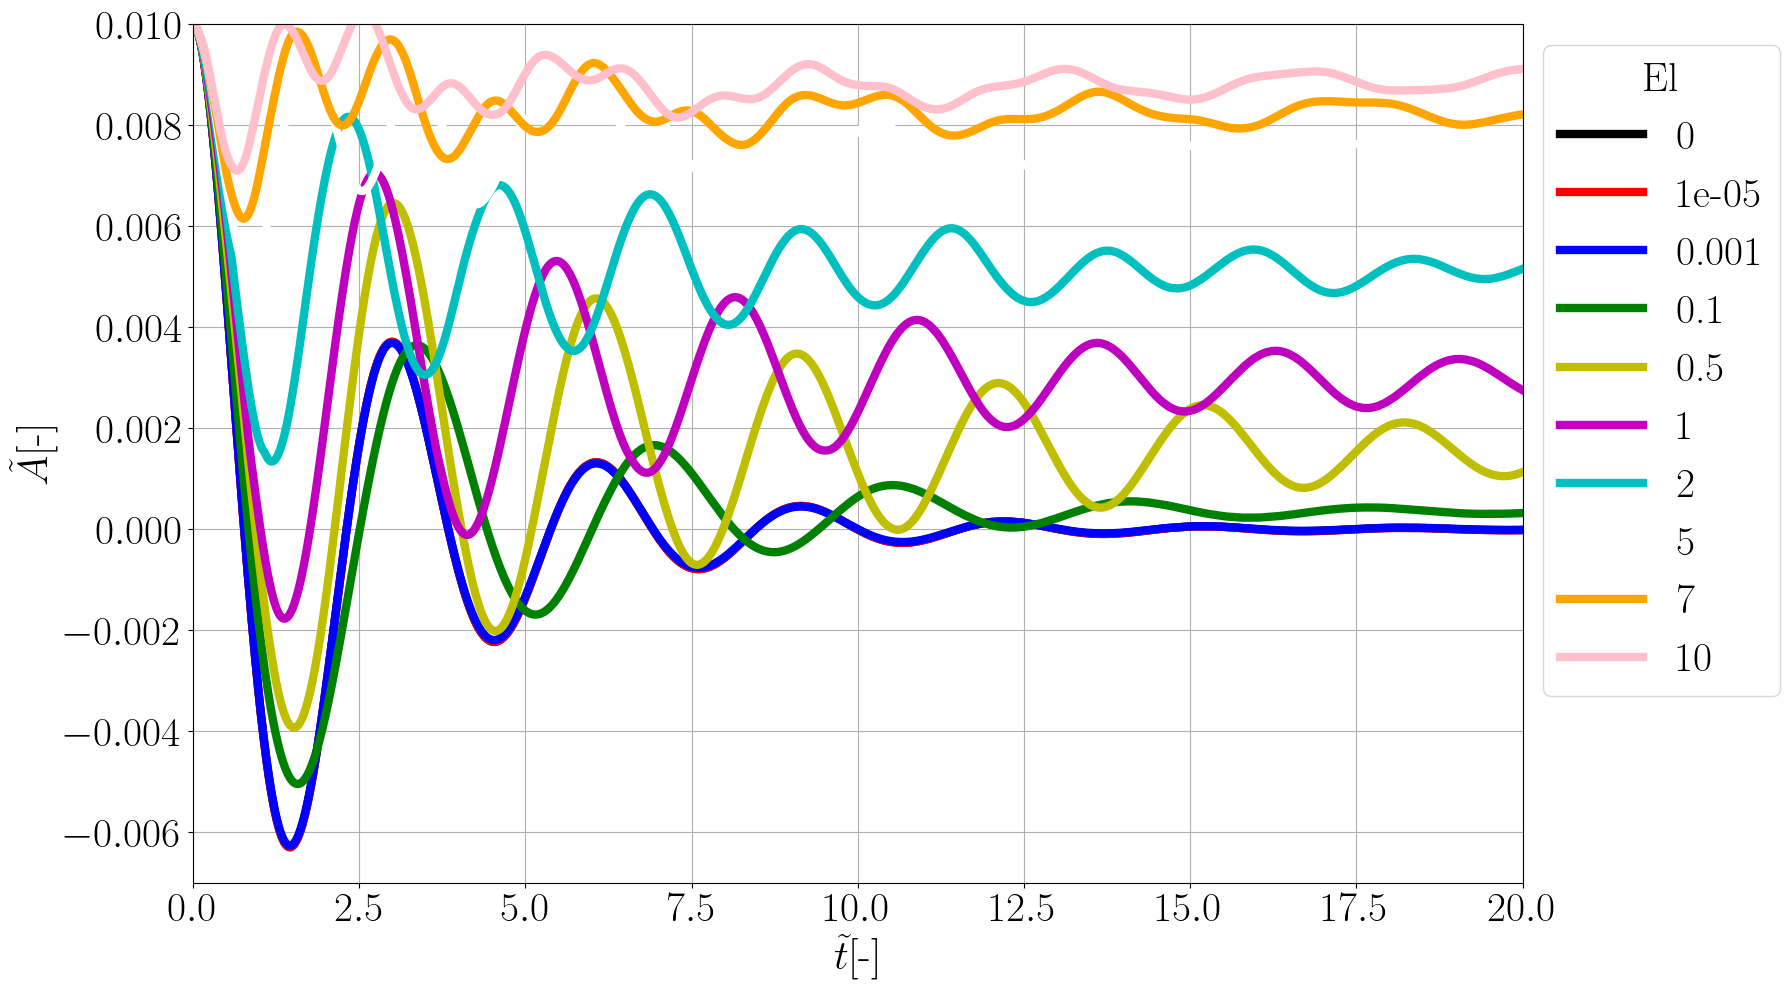

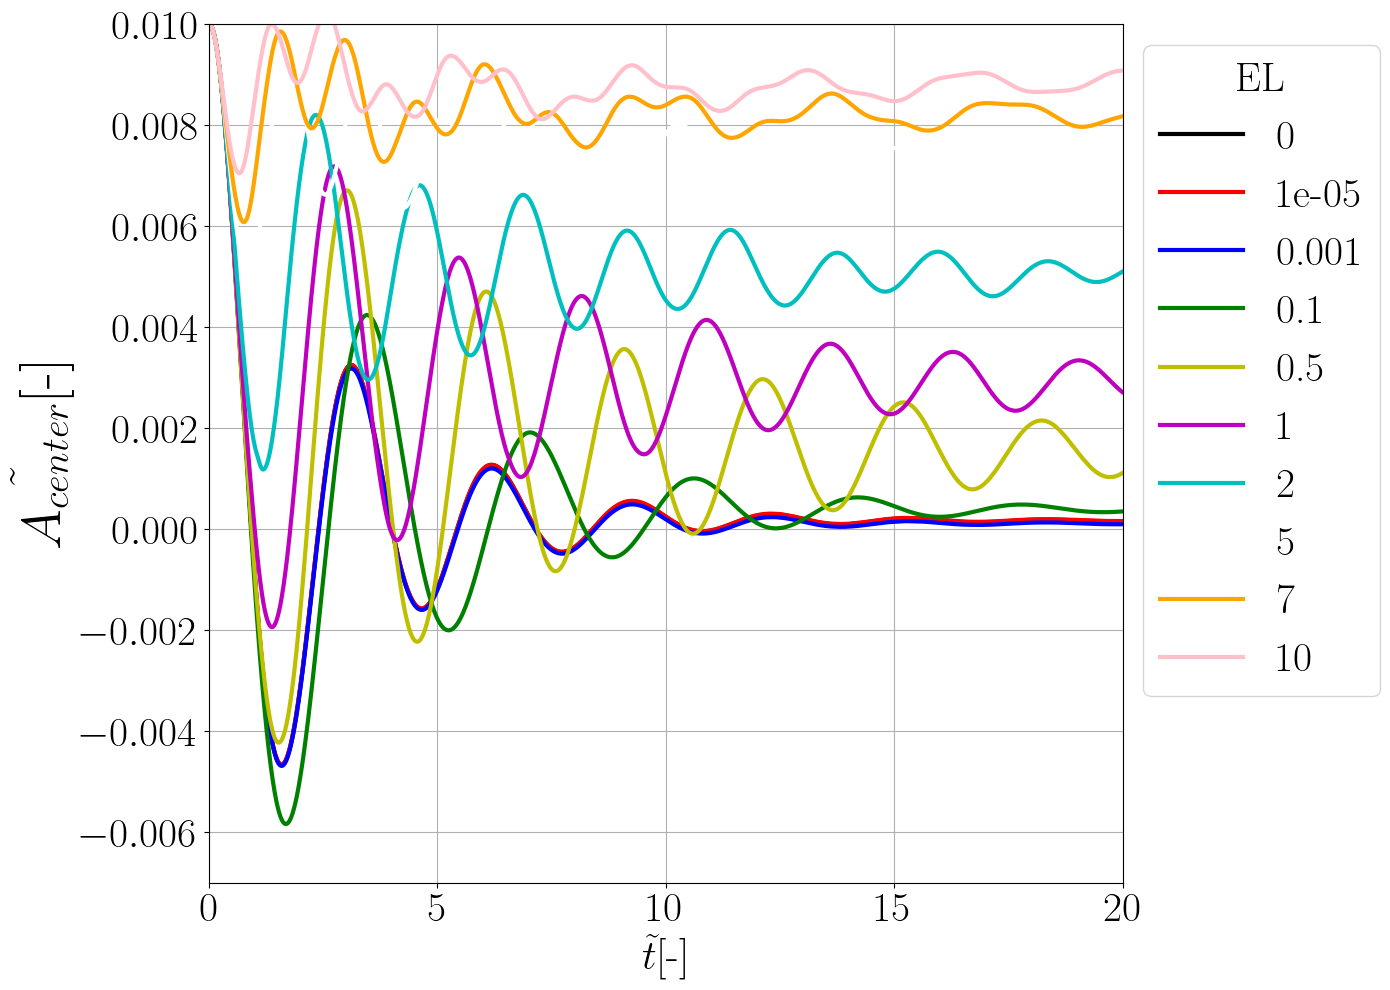

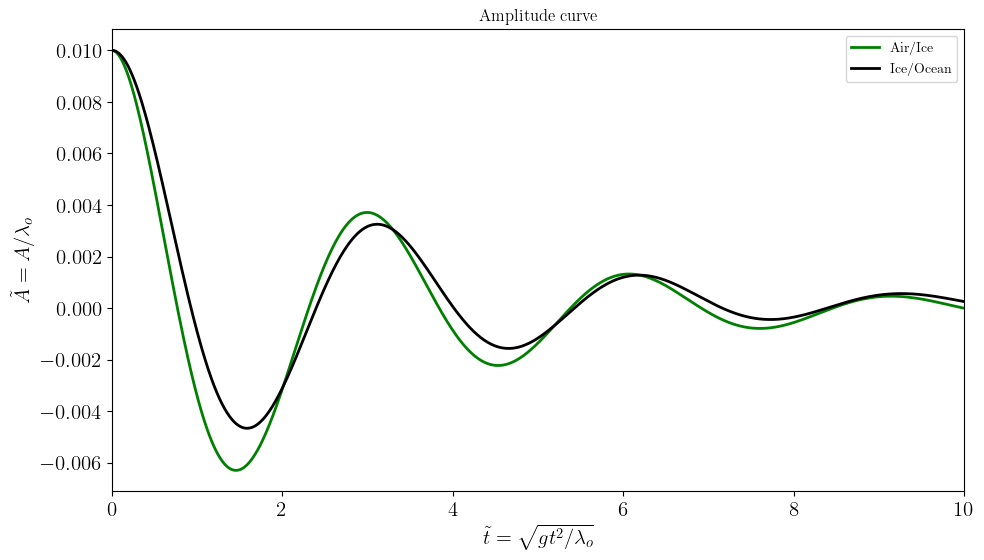

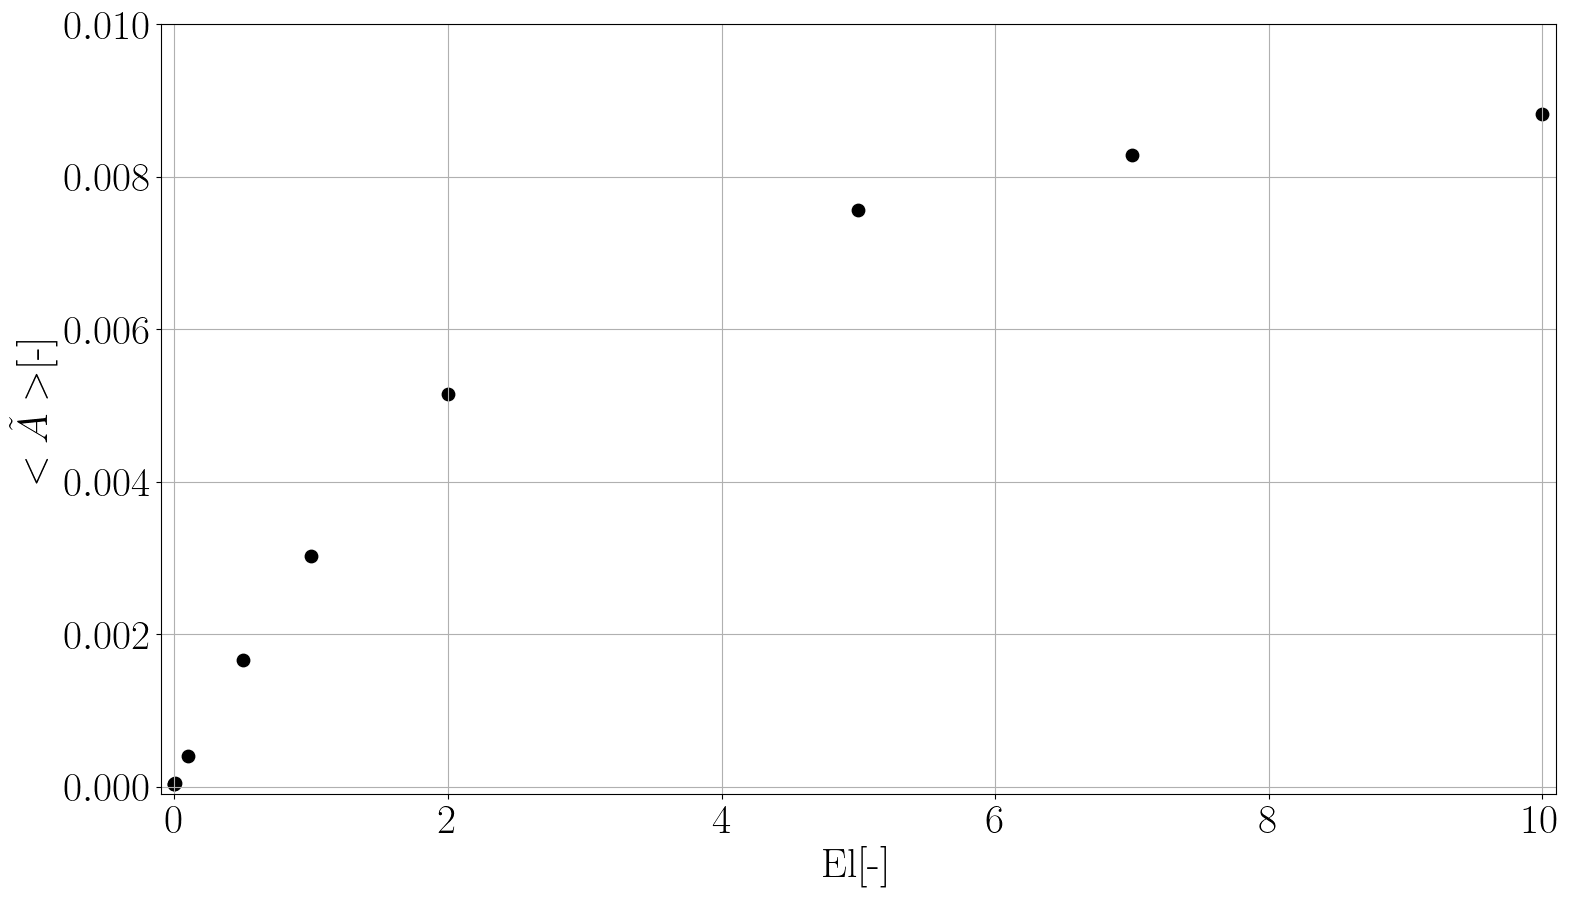

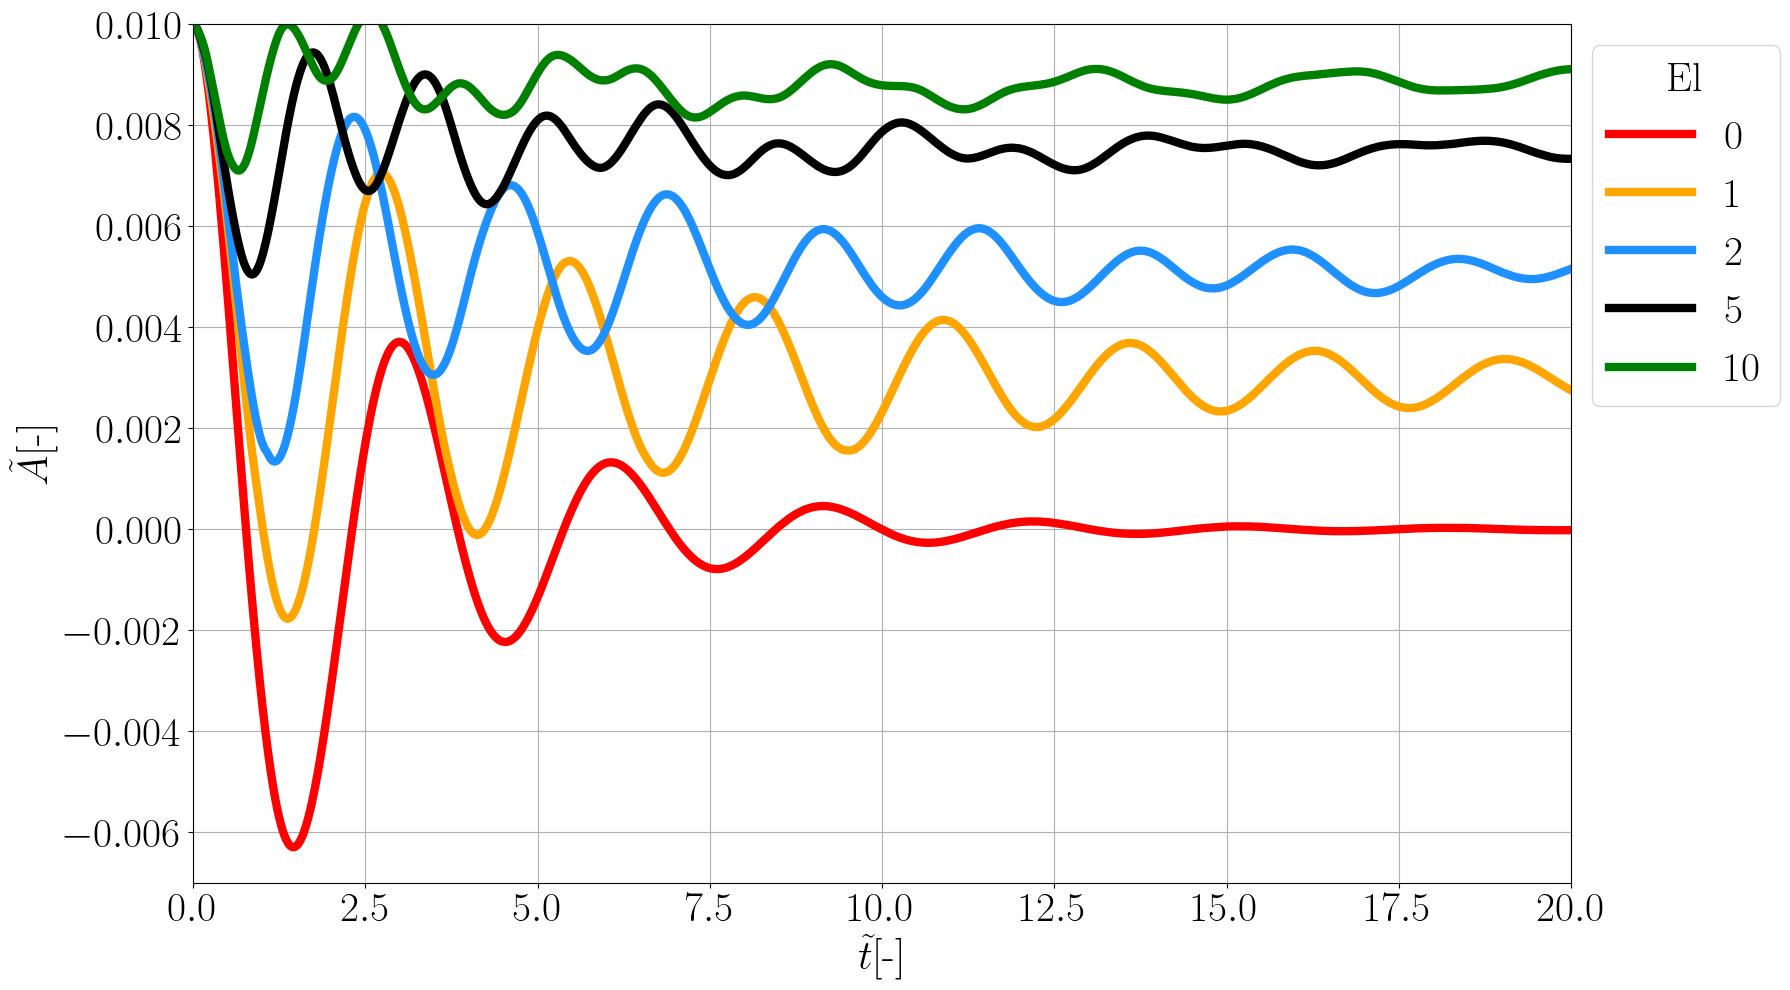

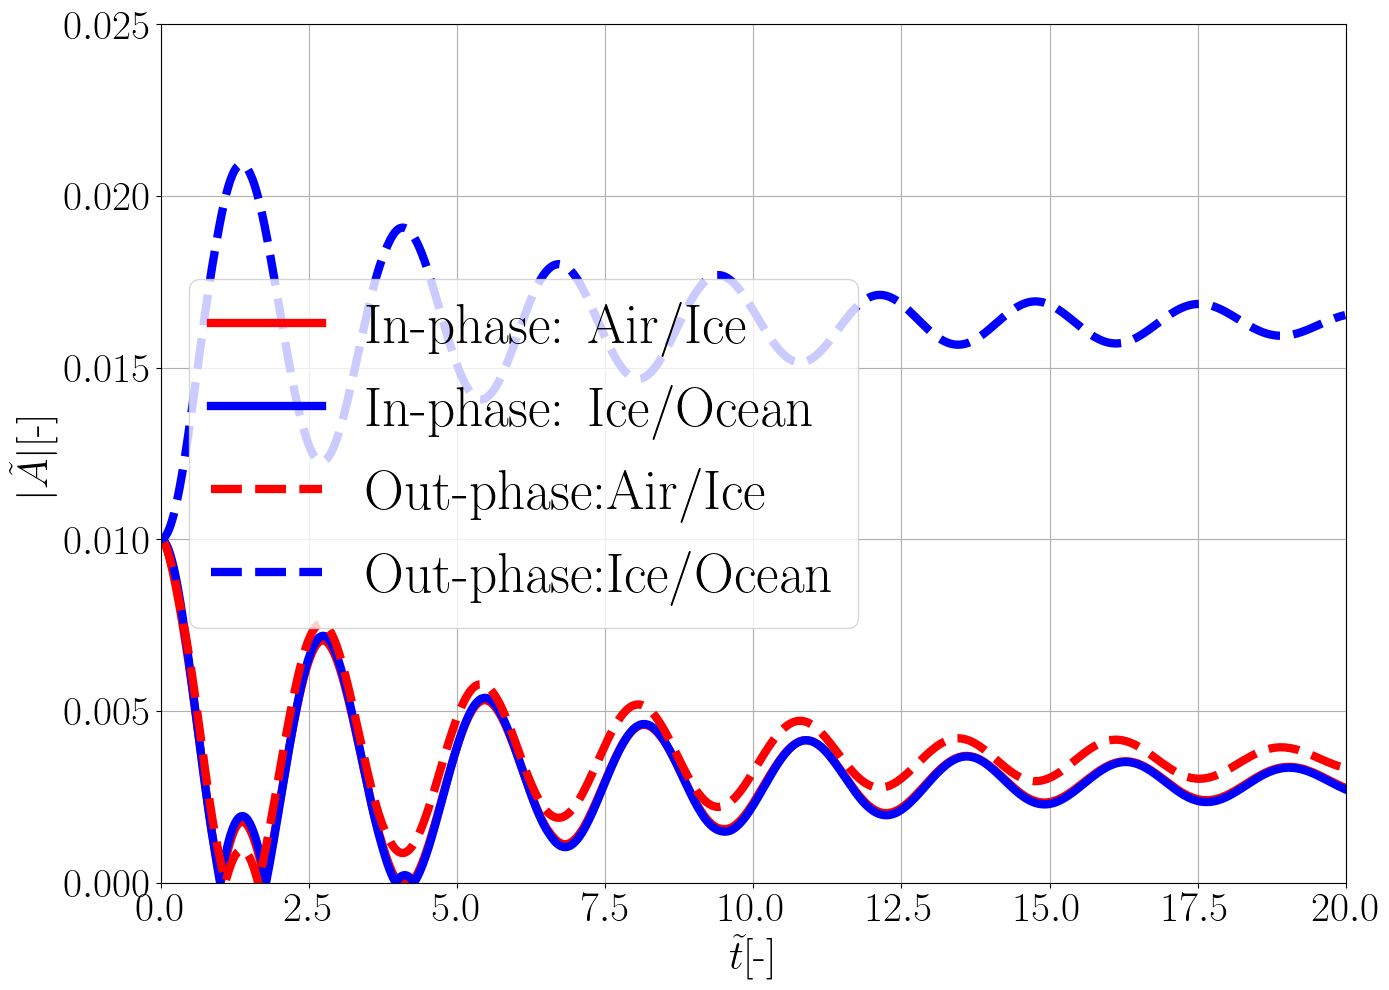

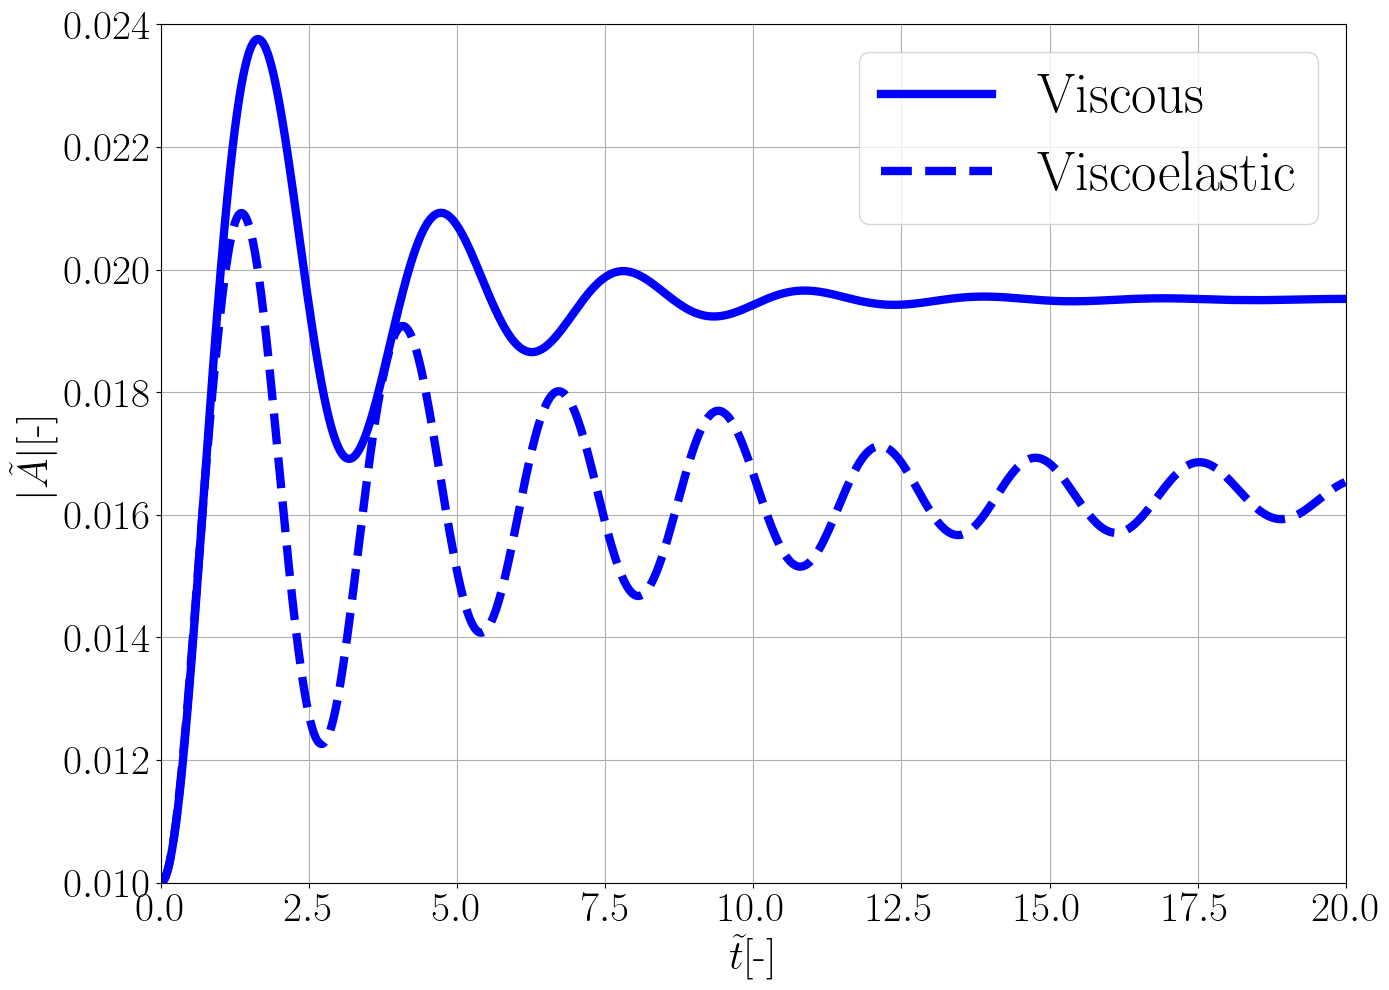

-0.0195223
-0.0165334


In [97]:
#Initialize variables 
E = [0,1e-5,1e-3,0.1,0.5,1,2,5,7,10]
folder = [3054,3051,3052,3053,3058,3059,3060,3061,3062,3055]
colors = ['k', 'r', 'b', 'g', 'y', 'm', 'c', 'w', 'orange', 'pink', 'purple', 'brown', 'lime', 'teal']
#linestyles = ['-', '--', '-.', ':']

#Function that extracts Amplitude data from ViscousOilonWaterWaves.c, numbered folders, and plots the 
#amplitude of both interfaces as a function of time for different mu_IceOcean
def plot_E_upper(folder,string):
    fig, ax = plt.subplots(1, 1, figsize=(18,10))
    for i in range(len(folder)):
        A0_Ocean, A0_Ice, t, AmpOcean, AmpIce = read_extract(f'/mnt/Valentin/IceOnWaterWaves_/{folder[i]}/center_amplitude.txt')
        #print(np.mean(AmpIce))
        #plt.axhline(y=np.mean(AmpIce), color='k', linestyle='--', label='Mean AmpIce')
        ax.plot(t, AmpIce, colors[i], lw=6, label=str(E[i]))
        ax.set_xlabel(r'$\tilde{t}$[-]', fontsize=30)
        ax.set_ylabel(r'$\tilde{A}$[-]', fontsize=30)
        ax.tick_params(axis='both', which='major', labelsize=30)
        ax.set_xlim([0., 20])
        ax.set_ylim([-0.007, 0.01])
        ax.grid(True)
    ax.legend(loc='upper left', bbox_to_anchor=(1,1),title='El', title_fontsize=30,fontsize=30)
    #plt.title("Interface Amplitude",fontsize=25)
    plt.tight_layout()
    plt.savefig(string)
    plt.show()


def plot_E_lower(folder,string):
    fig, ax = plt.subplots(1, 1, figsize=(14,10))
    for i in range(len(folder)):
        A0_Ocean, A0_Ice, t, AmpOcean, AmpIce = read_extract(f'/mnt/Valentin/IceOnWaterWaves_/{folder[i]}/center_amplitude.txt')
        #print(np.mean(AmpIce))
        #plt.axhline(y=np.mean(AmpIce), color='k', linestyle='--', label='Mean AmpIce')
        ax.plot(t, AmpOcean, colors[i], lw=3, label=str(E[i]))
        ax.set_xlabel(r'$\tilde{t}$[-]', fontsize=30)
        ax.set_ylabel(r'$\tilde{A_{center}}$[-]', fontsize=40)
        ax.tick_params(axis='both', which='major', labelsize=30)
        ax.set_xlim([0., 20])
        ax.set_ylim([-0.007, 0.01])
        ax.grid(True)
    ax.legend(loc='upper left', bbox_to_anchor=(1,1),title='EL', title_fontsize=30,fontsize=30)
    #plt.title("Interface Amplitude",fontsize=25)
    plt.tight_layout()
    plt.savefig(string)
    plt.show()



#plots for various values of Ga
plot_E_upper(folder,"E_upper")  
plot_E_lower(folder,"E_lower")  

fig, ax = plt.subplots(1, 1, figsize=(11,6))
A0_Ocean, A0_Ice, t, AmpOcean, AmpIce = read_extract(f'/mnt/Valentin/IceOnWaterWaves_/{3051}/center_amplitude.txt')
ax.plot(t, AmpIce, 'g', lw=2, label='Air/Ice')
ax.plot(t, AmpOcean, 'k', lw=2, label='Ice/Ocean')
ax.set_xlabel(r'$\tilde{t} = \sqrt{gt^2/\lambda_o}$', fontsize=15)
ax.set_ylabel(r'$\tilde{A} = A/\lambda_o$', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlim([0., 10])
#ax.set_ylim([0., A0_Ice])
ax.legend()
plt.title('Amplitude curve')
plt.savefig('E=1e0')
#plt.show()

def plot_ymean(E, folder,string):
    fig, ax = plt.subplots(1, 1, figsize=(18,10))
    ymean = np.empty(len(folder)) 
    for i in range(len(folder)):
        A0_Ocean, A0_Ice, t, AmpOcean, AmpIce = read_extract(f'/mnt/Valentin/IceOnWaterWaves_/{folder[i]}/center_amplitude.txt')
        ymean[i] = np.mean(AmpIce)
    ax.scatter(E, ymean, s=80, c='k')
    ax.set_xlabel(r'El[-]', fontsize=30)
    ax.set_ylabel(r'$<\tilde{A}>$[-]', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
    ax.set_xlim([-0.1, 10.1])
    ax.set_ylim([-0.0001, 0.01])
    ax.grid(True)
    #plt.title("ymean")
    plt.savefig(string)
    plt.show()


plot_ymean(E,folder,'ymean')
colors = ['r', 'orange','dodgerblue', 'k', 'g', 'teal']
E = [0,1,2,5,10]
folder = [3054,3059,3060,3061,3055]
plot_E_upper(folder,"E_upper") 

fig, ax = plt.subplots(1, 1, figsize=(14,10))
A0_Ocean, A0_Ice, tIn, InAmpOcean, InAmpIce = read_extract(f'/mnt/Valentin/IceOnWaterWaves_/{3059}/center_amplitude.txt')
A0_Ocean, A0_Ice, t, AmpOcean, AmpIce = read_extract(f'/mnt/Valentin/IceOnWaterWaves_/{3063}/center_amplitude.txt')
ax.plot(tIn, abs(InAmpIce), color='r', lw=6, label='In-phase: Air/Ice')
ax.plot(tIn, abs(InAmpOcean), color='b', lw=6, label='In-phase: Ice/Ocean')
ax.plot(t, abs(AmpIce), 'r',linestyle='--', lw=6, label='Out-phase:Air/Ice')
ax.plot(t, abs(AmpOcean), 'b',linestyle='--', lw=6, label='Out-phase:Ice/Ocean')
ax.set_xlabel(r'$\tilde{t}$[-]', fontsize=30)
ax.set_ylabel(r'$|\tilde{A}|$[-]', fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=30)
ax.set_xlim([0., 20])
ax.set_ylim([0, 0.025])
ax.legend(fontsize=40)
ax.grid(True)
plt.tight_layout()
plt.savefig('E_sym')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(14,10))
A0_Ocean, A0_Ice, tV, AmpOceanV, AmpIceV = read_extract(f'/mnt/Valentin/ViscousOilOnWaterWaves_/{2234}/center_amplitude.txt')
A0_Ocean, A0_Ice, t, AmpOcean, AmpIce = read_extract(f'/mnt/Valentin/IceOnWaterWaves_/{3063}/center_amplitude.txt')
ax.plot(tV, abs(AmpOceanV), color='b', lw=6, label='Viscous')
ax.plot(t, abs(AmpOcean), 'b',linestyle='--', lw=6, label='Viscoelastic')
ax.set_xlabel(r'$\tilde{t}$[-]', fontsize=30)
ax.set_ylabel(r'$|\tilde{A}|$[-]', fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=30)
ax.set_xlim([0., 20])
ax.set_ylim([0.01, 0.024])
ax.legend(fontsize=40)
ax.grid(True)
plt.tight_layout()
plt.savefig('Lower_comp')
plt.show()
print(AmpOceanV[-1])
print(AmpOcean[-1])